In [2]:
from torch.utils.data import TensorDataset
import numpy as np
from numpy import concatenate
from numpy import loadtxt
import pandas as pd
from pandas import read_csv,DataFrame,concat
from pandas.plotting import register_matplotlib_converters
from math import sqrt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,random_split,DistributedSampler,DataLoader

import random,os,copy
import pickle
from tqdm import tqdm
from collections import Counter

from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib import pyplot
from matplotlib import rc
import seaborn as sns

In [3]:
print("np",np.__version__)
print("pd",pd.__version__)
print("torch",torch.__version__)

np 1.22.3
pd 1.4.2
torch 1.11.0+cu113


In [353]:
user_sleep_2020_exer=pd.read_csv('./user_sleep_2020_exer.csv')

In [354]:
user_sleep_2020_exer=user_sleep_2020_exer.drop(columns=['Unnamed: 0'])

In [355]:
user_sleep_2020_exer

,userId,timezone,date_x,startDt,endDt,lastUpdate,wakeupduration,lightsleepduration,deepsleepduration,wakeupcount,...,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount,sleep_score,count,total,rank,walk,exer
0,user01,Asia/Seoul,2020-08-31,1598802240,1598830980,1598838373,3240,11700,6120,1,...,25,18,8880,16,83,2020-08-30,28740,1,0,20
1,user01,Asia/Seoul,2020-09-01,1598897280,1598922060,1598923633,1140,9660,6840,0,...,22,20,8280,16,82,2020-08-31,24780,1,0,0
2,user01,Asia/Seoul,2020-09-06,1599323460,1599358500,1599358571,3060,14700,9720,2,...,25,18,840,4,85,2020-09-05,35040,1,80,0
3,user01,Asia/Seoul,2020-09-08,1599497340,1599529380,1599530050,2880,16980,7080,1,...,27,15,6000,13,83,2020-09-07,32040,1,45,0
4,user01,Asia/Seoul,2020-09-09,1599591720,1599612000,1599617058,1440,8700,5760,1,...,22,14,1080,2,51,2020-09-08,20280,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,user30,Asia/Seoul,2020-09-22,1600702320,1600728060,1600728134,3780,11340,4200,2,...,23,20,7020,14,56,2020-09-21,25740,1,47,0
486,user30,Asia/Seoul,2020-09-23,1600789560,1600814400,1600814550,1260,10200,3240,0,...,21,29,8940,16,74,2020-09-22,24840,1,77,0
487,user30,Asia/Seoul,2020-09-24,1600875720,1600900800,1600900872,1860,10140,5100,5,...,21,22,10200,15,56,2020-09-23,25080,1,63,0
488,user30,Asia/Seoul,2020-09-25,1600965120,1600987200,1600987323,420,8820,4320,7,...,23,17,8940,12,56,2020-09-24,22080,1,68,0


In [356]:
user_sleep_2020_exer.columns

Index(['userId', 'timezone', 'date_x', 'startDt', 'endDt', 'lastUpdate',
       'wakeupduration', 'lightsleepduration', 'deepsleepduration',
       'wakeupcount', 'durationtosleep', 'remsleepduration',
       'durationtowakeup', 'hr_average', 'hr_min', 'hr_max', 'rr_average',
       'rr_min', 'rr_max', 'breathing_disturbances_intensity', 'snoring',
       'snoringepisodecount', 'sleep_score', 'count', 'total', 'rank', 'walk',
       'exer'],
      dtype='object')

In [357]:
user_sleep_2020_exer=user_sleep_2020_exer.rename(columns={'date_x':'date'})

In [358]:
user_sleep_2020_exer.columns

Index(['userId', 'timezone', 'date', 'startDt', 'endDt', 'lastUpdate',
       'wakeupduration', 'lightsleepduration', 'deepsleepduration',
       'wakeupcount', 'durationtosleep', 'remsleepduration',
       'durationtowakeup', 'hr_average', 'hr_min', 'hr_max', 'rr_average',
       'rr_min', 'rr_max', 'breathing_disturbances_intensity', 'snoring',
       'snoringepisodecount', 'sleep_score', 'count', 'total', 'rank', 'walk',
       'exer'],
      dtype='object')

In [359]:
user_survey_2020=pd.read_csv('./user_survey_2020.csv')

In [360]:
user_survey_2020.columns

Index(['userId', 'date', 'amPm', 'startInput', 'endInput', 'sleep',
       'sleepProblem', 'dream', 'amCondition', 'amEmotion', 'pmEmotion',
       'pmStress', 'pmFatigue', 'caffeine', 'cAmount(ml)', 'alcohol',
       'aAmount(ml)'],
      dtype='object')

In [361]:
user_survey_2020['sleepProblem'].value_counts()

0.0    337
2.0     79
1.0     59
5.0     34
3.0     32
9.0     27
7.0     23
6.0     17
4.0      5
8.0      2
Name: sleepProblem, dtype: int64

In [362]:
user_survey_2020_1=user_survey_2020.drop(user_survey_2020[user_survey_2020['amPm']=='pm'].index, axis=0)
user_survey_2020_2=user_survey_2020.drop(user_survey_2020[user_survey_2020['amPm']=='am'].index, axis=0)

In [363]:
from dateutil.relativedelta import relativedelta
from datetime import datetime

In [364]:
user_survey_2020_2.insert(10,'date1','')

In [365]:
user_survey_2020_2

,userId,date,amPm,startInput,endInput,sleep,sleepProblem,dream,amCondition,amEmotion,date1,pmEmotion,pmStress,pmFatigue,caffeine,cAmount(ml),alcohol,aAmount(ml)
1,user24,2020-08-29,pm,2020-08-29 21:23,2020-08-29 21:23,NaN,NaN,NaN,NaN,NaN,,4.0,4.0,2.0,NaN,NaN,NaN,NaN
3,user24,2020-08-30,pm,2020-08-30 22:43,2020-08-30 22:43,NaN,NaN,NaN,NaN,NaN,,4.0,5.0,2.0,coffee,200.0,NaN,NaN
5,user24,2020-08-31,pm,2020-08-31 21:19,2020-08-31 21:19,NaN,NaN,NaN,NaN,NaN,,4.0,2.0,4.0,coffee,200.0,NaN,NaN
7,user24,2020-09-01,pm,2020-09-01 21:45,2020-09-01 21:45,NaN,NaN,NaN,NaN,NaN,,5.0,4.0,3.0,coffee,150.0,NaN,NaN
9,user24,2020-09-02,pm,2020-09-02 21:38,2020-09-02 21:39,NaN,NaN,NaN,NaN,NaN,,4.0,4.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,user06,2020-10-04,pm,2020-10-05 0:02,2020-10-05 0:03,NaN,NaN,NaN,NaN,NaN,,3.0,2.0,3.0,NaN,NaN,NaN,NaN
1223,user06,2020-10-05,pm,2020-10-05 23:42,2020-10-05 23:43,NaN,NaN,NaN,NaN,NaN,,4.0,4.0,4.0,NaN,NaN,NaN,NaN
1225,user06,2020-10-06,pm,2020-10-07 0:07,2020-10-07 0:08,NaN,NaN,NaN,NaN,NaN,,4.0,4.0,4.0,NaN,NaN,NaN,NaN
1227,user06,2020-10-07,pm,2020-10-08 1:57,2020-10-08 1:57,NaN,NaN,NaN,NaN,NaN,,5.0,2.0,3.0,coffee,250.0,NaN,NaN


In [366]:
user_survey_2020_2=user_survey_2020_2.reset_index(drop=True)

In [367]:
dif = relativedelta(days=1)
for i in range(len(user_survey_2020_2)):
    user_survey_2020_2['date1'][i]=(datetime.strptime(user_survey_2020_2['date'][i],'%Y-%m-%d')-dif).strftime('%Y-%m-%d')

<ipython-input-367-5dc68c84200c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_survey_2020_2['date1'][i]=(datetime.strptime(user_survey_2020_2['date'][i],'%Y-%m-%d')-dif).strftime('%Y-%m-%d')


In [368]:
user_survey_2020_2['date']

0      2020-08-29
1      2020-08-30
2      2020-08-31
3      2020-09-01
4      2020-09-02
          ...    
610    2020-10-04
611    2020-10-05
612    2020-10-06
613    2020-10-07
614    2020-10-08
Name: date, Length: 615, dtype: object

In [369]:
user = pd.merge(user_sleep_2020_exer, user_survey_2020_1, left_on =['userId','date'], right_on=['userId', 'date'], how = 'left' )

In [370]:
user.columns

Index(['userId', 'timezone', 'date', 'startDt', 'endDt', 'lastUpdate',
       'wakeupduration', 'lightsleepduration', 'deepsleepduration',
       'wakeupcount', 'durationtosleep', 'remsleepduration',
       'durationtowakeup', 'hr_average', 'hr_min', 'hr_max', 'rr_average',
       'rr_min', 'rr_max', 'breathing_disturbances_intensity', 'snoring',
       'snoringepisodecount', 'sleep_score', 'count', 'total', 'rank', 'walk',
       'exer', 'amPm', 'startInput', 'endInput', 'sleep', 'sleepProblem',
       'dream', 'amCondition', 'amEmotion', 'pmEmotion', 'pmStress',
       'pmFatigue', 'caffeine', 'cAmount(ml)', 'alcohol', 'aAmount(ml)'],
      dtype='object')

In [371]:
user=user.drop(columns=['amPm','pmEmotion', 'pmStress',
       'pmFatigue', 'caffeine', 'cAmount(ml)', 'alcohol', 'aAmount(ml)'])

In [372]:
user.columns

Index(['userId', 'timezone', 'date', 'startDt', 'endDt', 'lastUpdate',
       'wakeupduration', 'lightsleepduration', 'deepsleepduration',
       'wakeupcount', 'durationtosleep', 'remsleepduration',
       'durationtowakeup', 'hr_average', 'hr_min', 'hr_max', 'rr_average',
       'rr_min', 'rr_max', 'breathing_disturbances_intensity', 'snoring',
       'snoringepisodecount', 'sleep_score', 'count', 'total', 'rank', 'walk',
       'exer', 'startInput', 'endInput', 'sleep', 'sleepProblem', 'dream',
       'amCondition', 'amEmotion'],
      dtype='object')

In [373]:
user_sleep_2020_sorted_e4 = pd.read_csv("user_sleep_2020_sorted_e4.csv")

In [374]:
user_sleep_2020_sorted_e4=user_sleep_2020_sorted_e4[['userId', 'date','e4Bvp', 'e4Eda','e4Hr', 'e4Temp']]

In [375]:
user_survey_2020_2=pd.merge(user_survey_2020_2, user_sleep_2020_sorted_e4, left_on=['userId','date1'], right_on=['userId', 'date'], how='left')

In [376]:
user_survey_2020_2.columns

Index(['userId', 'date_x', 'amPm', 'startInput', 'endInput', 'sleep',
       'sleepProblem', 'dream', 'amCondition', 'amEmotion', 'date1',
       'pmEmotion', 'pmStress', 'pmFatigue', 'caffeine', 'cAmount(ml)',
       'alcohol', 'aAmount(ml)', 'date_y', 'e4Bvp', 'e4Eda', 'e4Hr', 'e4Temp'],
      dtype='object')

In [377]:
user_survey_2020_2=user_survey_2020_2.drop(columns=['date_x', 'date_y'])

In [378]:
user_sleep_2020_exer1 = pd.read_csv("user_sleep_2020_exer1.csv")

In [379]:
user_sleep_2020_exer1=user_sleep_2020_exer1[['userId', 'date','gps_activity_distance']]

In [380]:
user_survey_2020_2=pd.merge(user_survey_2020_2, user_sleep_2020_exer1, left_on=['userId','date1'], right_on=['userId', 'date'], how='left')

In [381]:
user_survey_2020_2=user_survey_2020_2.drop(columns=['date'])

In [382]:
user = pd.merge(user, user_survey_2020_2, left_on =['userId','date'], right_on=['userId', 'date1'], how = 'left' )

In [383]:
user.columns

Index(['userId', 'timezone', 'date', 'startDt', 'endDt', 'lastUpdate',
       'wakeupduration', 'lightsleepduration', 'deepsleepduration',
       'wakeupcount', 'durationtosleep', 'remsleepduration',
       'durationtowakeup', 'hr_average', 'hr_min', 'hr_max', 'rr_average',
       'rr_min', 'rr_max', 'breathing_disturbances_intensity', 'snoring',
       'snoringepisodecount', 'sleep_score', 'count', 'total', 'rank', 'walk',
       'exer', 'startInput_x', 'endInput_x', 'sleep_x', 'sleepProblem_x',
       'dream_x', 'amCondition_x', 'amEmotion_x', 'amPm', 'startInput_y',
       'endInput_y', 'sleep_y', 'sleepProblem_y', 'dream_y', 'amCondition_y',
       'amEmotion_y', 'date1', 'pmEmotion', 'pmStress', 'pmFatigue',
       'caffeine', 'cAmount(ml)', 'alcohol', 'aAmount(ml)', 'e4Bvp', 'e4Eda',
       'e4Hr', 'e4Temp', 'gps_activity_distance'],
      dtype='object')

In [384]:
user=user.drop(columns=['amPm','startInput_y', 'endInput_y', 'sleep_y', 'sleepProblem_y', 'dream_y',
       'amCondition_y', 'amEmotion_y'])

In [385]:
user_sleep_2020_exer['exer'].value_counts()

0      388
30       7
50       6
60       6
20       5
      ... 
140      1
71       1
98       1
70       1
15       1
Name: exer, Length: 65, dtype: int64

In [386]:
user.columns

Index(['userId', 'timezone', 'date', 'startDt', 'endDt', 'lastUpdate',
       'wakeupduration', 'lightsleepduration', 'deepsleepduration',
       'wakeupcount', 'durationtosleep', 'remsleepduration',
       'durationtowakeup', 'hr_average', 'hr_min', 'hr_max', 'rr_average',
       'rr_min', 'rr_max', 'breathing_disturbances_intensity', 'snoring',
       'snoringepisodecount', 'sleep_score', 'count', 'total', 'rank', 'walk',
       'exer', 'startInput_x', 'endInput_x', 'sleep_x', 'sleepProblem_x',
       'dream_x', 'amCondition_x', 'amEmotion_x', 'date1', 'pmEmotion',
       'pmStress', 'pmFatigue', 'caffeine', 'cAmount(ml)', 'alcohol',
       'aAmount(ml)', 'e4Bvp', 'e4Eda', 'e4Hr', 'e4Temp',
       'gps_activity_distance'],
      dtype='object')

In [387]:
from sklearn.linear_model import LogisticRegression

In [220]:
#0 만족함 1, 만족못함
outcome2=user['sleep_x'].apply(lambda x: 1 if x==1 or x==2 else 0)

In [ ]:
#0  수면 문제없음, 1 있음
outcome=user['sleepProblem_x'].apply(lambda x: 0 if x==0 else 1)

In [ ]:
#0 꿈 안꿈, 1 꿈 꿈
outcome1=user['dream_x'].apply(lambda x: 0 if x==4 else 1)

In [ ]:
#0 만족함 1, 만족못함
outcome3=user['amCondition_x'].apply(lambda x: 1 if x==1 or x==2 else 0)

In [ ]:
#0 만족함 1, 만족못함
outcome4=user['amEmotion_x'].apply(lambda x: 1 if x==1 or x==2 else 0)

In [ ]:
outcome.value_counts()

In [ ]:
outcome1.value_counts()

In [ ]:
outcome2.value_counts()

In [ ]:
outcome3.value_counts()

In [ ]:
outcome4.value_counts()

In [388]:
user_info_2020=pd.read_csv('./user_info_2020.csv')

In [389]:
user = pd.merge(user, user_info_2020, left_on =['userId'], right_on=['userId'], how = 'left' )

In [390]:
user.columns

Index(['userId', 'timezone', 'date', 'startDt_x', 'endDt_x', 'lastUpdate',
       'wakeupduration', 'lightsleepduration', 'deepsleepduration',
       'wakeupcount', 'durationtosleep', 'remsleepduration',
       'durationtowakeup', 'hr_average', 'hr_min', 'hr_max', 'rr_average',
       'rr_min', 'rr_max', 'breathing_disturbances_intensity', 'snoring',
       'snoringepisodecount', 'sleep_score', 'count', 'total', 'rank', 'walk',
       'exer', 'startInput_x', 'endInput_x', 'sleep_x', 'sleepProblem_x',
       'dream_x', 'amCondition_x', 'amEmotion_x', 'date1', 'pmEmotion',
       'pmStress', 'pmFatigue', 'caffeine', 'cAmount(ml)', 'alcohol',
       'aAmount(ml)', 'e4Bvp', 'e4Eda', 'e4Hr', 'e4Temp',
       'gps_activity_distance', 'gender', 'age', 'handed', 'height', 'weight',
       'startDt_y', 'endDt_y'],
      dtype='object')

In [391]:
user=user.drop(columns=['startDt_y', 'endDt_y'])

In [392]:
user['alcohol'].isna().sum()

438

In [393]:
user

,userId,timezone,date,startDt_x,endDt_x,lastUpdate,wakeupduration,lightsleepduration,deepsleepduration,wakeupcount,...,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance,gender,age,handed,height,weight
0,user01,Asia/Seoul,2020-08-31,1598802240,1598830980,1598838373,3240,11700,6120,1,...,NaN,NaN,NaN,NaN,NaN,M,27,Left,167,76
1,user01,Asia/Seoul,2020-09-01,1598897280,1598922060,1598923633,1140,9660,6840,0,...,NaN,NaN,NaN,NaN,NaN,M,27,Left,167,76
2,user01,Asia/Seoul,2020-09-06,1599323460,1599358500,1599358571,3060,14700,9720,2,...,NaN,NaN,NaN,NaN,NaN,M,27,Left,167,76
3,user01,Asia/Seoul,2020-09-08,1599497340,1599529380,1599530050,2880,16980,7080,1,...,-0.013653,3.103176,86.727616,33.021747,NaN,M,27,Left,167,76
4,user01,Asia/Seoul,2020-09-09,1599591720,1599612000,1599617058,1440,8700,5760,1,...,0.056283,2.503302,87.789920,34.441982,NaN,M,27,Left,167,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,user30,Asia/Seoul,2020-09-23,1600789560,1600814400,1600814550,1260,10200,3240,0,...,0.079167,0.160334,80.474611,31.358667,NaN,M,26,Right,174,58
525,user30,Asia/Seoul,2020-09-24,1600875720,1600900800,1600900872,1860,10140,5100,5,...,-0.137140,0.076865,73.867833,33.963111,NaN,M,26,Right,174,58
526,user30,Asia/Seoul,2020-09-24,1600875720,1600900800,1600900872,1860,10140,5100,5,...,-0.137140,0.076865,73.867833,33.963111,NaN,M,26,Right,174,58
527,user30,Asia/Seoul,2020-09-25,1600965120,1600987200,1600987323,420,8820,4320,7,...,0.018909,0.159650,79.769218,33.107910,NaN,M,26,Right,174,58


In [394]:
user.columns

Index(['userId', 'timezone', 'date', 'startDt_x', 'endDt_x', 'lastUpdate',
       'wakeupduration', 'lightsleepduration', 'deepsleepduration',
       'wakeupcount', 'durationtosleep', 'remsleepduration',
       'durationtowakeup', 'hr_average', 'hr_min', 'hr_max', 'rr_average',
       'rr_min', 'rr_max', 'breathing_disturbances_intensity', 'snoring',
       'snoringepisodecount', 'sleep_score', 'count', 'total', 'rank', 'walk',
       'exer', 'startInput_x', 'endInput_x', 'sleep_x', 'sleepProblem_x',
       'dream_x', 'amCondition_x', 'amEmotion_x', 'date1', 'pmEmotion',
       'pmStress', 'pmFatigue', 'caffeine', 'cAmount(ml)', 'alcohol',
       'aAmount(ml)', 'e4Bvp', 'e4Eda', 'e4Hr', 'e4Temp',
       'gps_activity_distance', 'gender', 'age', 'handed', 'height', 'weight'],
      dtype='object')

In [228]:
user_sleep_2020_exer1

,userId,date,gps_activity_distance
0,user01,2020-08-31,NaN
1,user01,2020-09-01,NaN
2,user01,2020-09-06,NaN
3,user01,2020-09-08,NaN
4,user01,2020-09-09,NaN
...,...,...,...
485,user30,2020-09-22,NaN
486,user30,2020-09-23,NaN
487,user30,2020-09-24,NaN
488,user30,2020-09-25,NaN


In [410]:
user_sleep_2019_exer1=pd.read_csv('./user_sleep_2019_exer1.csv')

In [411]:
user_sleep_2019_exer1=user_sleep_2019_exer1.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [412]:
user_survey_2019_2018=pd.read_csv('./user_survey_2019_2018.csv')

In [413]:
user_survey_2019_2018.columns

Index(['userId', 'amPm', 'inputDt', 'sleep', 'sleepProblem', 'dream',
       'amCondition', 'amEmotion', 'pmEmotion', 'pmStress', 'ifUnusual',
       'breakfast', 'lunch', 'dinner', 'lateSnack', 'amCaffeine',
       'amCaffAmount', 'pmCaffeine', 'pmCaffAmount', 'alcohol', 'aAmount'],
      dtype='object')

In [414]:
user_sleep_2019_exer1

,startDt,endDt,device,sleep_score,total_sleep_time,time_in_bed,waso,wakeupcount,aal,movement_index,...,sleep_frag_index,startdt1,enddt1,count,date,userId,walk,exer,userName,gps_activity_distance
0,16DEC19:10:41:00,16DEC19:20:56:00,Actigraph,97.89,36120,36900,780,2,6.50,12.060,...,12.060,20191216,20191216,2,2019-12-15,user02,0,0,NaN,NaN
1,16DEC19:00:23:00,16DEC19:09:23:00,Actigraph,82.44,26760,32460,5700,3,31.67,6.412,...,31.412,20191216,20191216,2,2019-12-15,user02,0,0,NaN,NaN
2,05DEC19:02:21:00,05DEC19:07:05:00,Actigraph,96.48,16440,17040,600,8,1.25,4.930,...,4.930,20191205,20191205,3,2019-12-04,user04,50,0,user04,0.0
3,05DEC19:08:10:00,05DEC19:17:29:00,Actigraph,98.03,32880,33540,660,4,2.75,1.431,...,1.431,20191205,20191205,3,2019-12-04,user04,50,0,user04,0.0
4,05DEC19:18:16:00,06DEC19:01:20:00,Actigraph,99.53,25320,25440,120,2,1.00,2.358,...,2.358,20191205,20191206,3,2019-12-05,user04,14,0,user04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,10FEB20:11:14:00,11FEB20:02:49:00,Actigraph,100.00,56100,56100,0,0,0.00,0.214,...,0.214,20200210,20200211,2,2020-02-10,user20,34,0,user20,0.0
335,11FEB20:06:44:00,11FEB20:11:13:00,Actigraph,87.36,14100,16140,2040,16,2.13,10.037,...,27.684,20200211,20200211,2,2020-02-10,user20,34,0,user20,0.0
336,11FEB20:11:24:00,12FEB20:05:03:00,Actigraph,100.00,63540,63540,0,0,0.00,0.378,...,0.378,20200211,20200212,2,2020-02-11,user20,132,0,user20,0.0
337,12FEB20:07:22:00,13FEB20:04:00:00,Actigraph,96.45,71640,74280,2640,19,2.32,3.150,...,3.150,20200212,20200213,1,2020-02-12,user20,156,0,user20,0.0


In [415]:
user_survey_2019=pd.read_csv('./user_survey_2019.csv')

In [ ]:
user_survey_2019['userId1']=""
for i in range(len(user_survey_2019)):
    if user_survey_2019['userId'][i]==101:
        user_survey_2019['userId1'][i]='user01'
    elif user_survey_2019['userId'][i]==102:
        user_survey_2019['userId1'][i]='user02'
    elif user_survey_2019['userId'][i]==103:
        user_survey_2019['userId1'][i]='user03'
    elif user_survey_2019['userId'][i]==104:
        user_survey_2019['userId1'][i]='user04'
    elif user_survey_2019['userId'][i]==105:
        user_survey_2019['userId1'][i]='user05'
    elif user_survey_2019['userId'][i]==106:
        user_survey_2019['userId1'][i]='user06'
    elif user_survey_2019['userId'][i]==107:
        user_survey_2019['userId1'][i]='user07'
    elif user_survey_2019['userId'][i]==108:
        user_survey_2019['userId1'][i]='user08'
    elif user_survey_2019['userId'][i]==109:
        user_survey_2019['userId1'][i]='user09'
    elif user_survey_2019['userId'][i]==110:
        user_survey_2019['userId1'][i]='user10'
    elif user_survey_2019['userId'][i]==111:
        user_survey_2019['userId1'][i]='user11'
    elif user_survey_2019['userId'][i]==112:
        user_survey_2019['userId1'][i]='user12'
    elif user_survey_2019['userId'][i]==113:
        user_survey_2019['userId1'][i]='user13'
    elif user_survey_2019['userId'][i]==114:
        user_survey_2019['userId1'][i]='user14'
    elif user_survey_2019['userId'][i]==115:
        user_survey_2019['userId1'][i]='user15'
    elif user_survey_2019['userId'][i]==116:
        user_survey_2019['userId1'][i]='user16'
    elif user_survey_2019['userId'][i]==117:
        user_survey_2019['userId1'][i]='user17'
    elif user_survey_2019['userId'][i]==118:
        user_survey_2019['userId1'][i]='user18'
    elif user_survey_2019['userId'][i]==119:
        user_survey_2019['userId1'][i]='user19'
    elif user_survey_2019['userId'][i]==120:
        user_survey_2019['userId1'][i]='user20'

In [417]:
user_survey_2019_1=user_survey_2019.drop(user_survey_2019[user_survey_2019['amPm']=='pm'].index, axis=0)
user_survey_2019_2=user_survey_2019.drop(user_survey_2019[user_survey_2019['amPm']=='am'].index, axis=0)

In [418]:
user_survey_2019_1=user_survey_2019_1.reset_index(drop=True)
user_survey_2019_2=user_survey_2019_2.reset_index(drop=True)

In [419]:
user_survey_2019_2['inputdt1']

0      20200118
1      20200119
2      20200120
3      20200121
4      20200122
         ...   
279    20200131
280    20200201
281    20200202
282    20200203
283    20200204
Name: inputdt1, Length: 284, dtype: int64

In [420]:
from datetime import datetime, timedelta
dif = relativedelta(days=1)
for i in range(len(user_survey_2019_2)):
    user_survey_2019_2['startdt'][i]=(datetime.strptime(str(user_survey_2019_2['inputdt1'][i]),'%Y%m%d')-dif).strftime('%Y-%m-%d')

<ipython-input-420-f158ec152091>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_survey_2019_2['startdt'][i]=(datetime.strptime(str(user_survey_2019_2['inputdt1'][i]),'%Y%m%d')-dif).strftime('%Y-%m-%d')


In [421]:
user_survey_2019_2=user_survey_2019_2.rename(columns={'startdt':'date1'})

In [422]:
for i in range(len(user_survey_2019_1)):
    user_survey_2019_1['inputdt1'][i]=datetime.strptime(str(user_survey_2019_1['inputdt1'][i]),'%Y%m%d').strftime('%Y-%m-%d')

<ipython-input-422-471df3ebddbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_survey_2019_1['inputdt1'][i]=datetime.strptime(str(user_survey_2019_1['inputdt1'][i]),'%Y%m%d').strftime('%Y-%m-%d')


In [423]:
user_survey_2019_1=user_survey_2019_1.drop(columns=['userId'])
user_survey_2019_1=user_survey_2019_1.rename(columns={'userId1':'userId'})

In [424]:
user_survey_2019_1=user_survey_2019_1.rename(columns={'inputdt1':'date1'})

In [425]:
user_sleep_2019_exer1=user_sleep_2019_exer1.drop(columns=['userName'])

In [426]:
user_survey_2019_1=user_survey_2019_1[['sleep', 'sleepProblem','dream','amCondition','amEmotion','date1','userId']]

In [427]:
user1 = pd.merge(user_sleep_2019_exer1, user_survey_2019_1, left_on =['userId','date'], right_on=['userId', 'date1'], how = 'left' )

In [428]:
user_survey_2019_2.columns

Index(['userId', 'amPm', 'inputDt', 'sleep', 'sleepProblem', 'dream',
       'amCondition', 'amEmotion', 'pmEmotion', 'pmStress', 'ifUnusual',
       'breakfast', 'lunch', 'dinner', 'lateSnack', 'amCaffeine',
       'amCaffAmount', 'pmCaffeine', 'pmCaffAmount', 'alcohol', 'aAmount',
       'startdt1', 'date1', 'enddt1', 'enddt', 'inputdt1', 'userId1'],
      dtype='object')

In [429]:
user_survey_2019_2=user_survey_2019_2[['date1','userId1', 'pmEmotion', 'pmStress','amCaffeine',
       'amCaffAmount', 'pmCaffeine', 'pmCaffAmount', 'alcohol', 'aAmount']]

In [430]:
user_survey_2019_2=user_survey_2019_2.rename(columns={'userId1':'userId'})

In [431]:
user_survey_2019_2['amCaffeine']=user_survey_2019_2['amCaffeine'].fillna(0)
user_survey_2019_2['pmCaffeine']=user_survey_2019_2['pmCaffeine'].fillna(0)
user_survey_2019_2['amCaffAmount']=user_survey_2019_2['amCaffAmount'].fillna(0)
user_survey_2019_2['pmCaffAmount']=user_survey_2019_2['pmCaffAmount'].fillna(0)
user_survey_2019_2['alcohol']=user_survey_2019_2['alcohol'].fillna(0)
user_survey_2019_2['aAmount']=user_survey_2019_2['aAmount'].fillna(0)

In [432]:
user_survey_2019_2['caffeine']=''
user_survey_2019_2['cAmount(ml)']=''
user_survey_2019_2['aAmount(ml)']=''

In [433]:
user_survey_2019_2['amCaffeine']=user_survey_2019_2['amCaffeine'].apply(lambda x: 0 if x==0 else 1)
user_survey_2019_2['pmCaffeine']=user_survey_2019_2['pmCaffeine'].apply(lambda x: 0 if x==0 else 1)
user_survey_2019_2['alcohol']=user_survey_2019_2['alcohol'].apply(lambda x: 0 if x==0 else 1)

In [434]:
user_survey_2019_2['caffeine']=user_survey_2019_2['amCaffeine']+user_survey_2019_2['pmCaffeine']

In [435]:
user_survey_2019_2['caffeine']=user_survey_2019_2['caffeine'].apply(lambda x: 0 if x==0 else 1)

In [436]:
user_survey_2019_2['cAmount(ml)']=user_survey_2019_2['amCaffAmount']+user_survey_2019_2['pmCaffAmount']

In [437]:
user_survey_2019_2['aAmount(ml)']=user_survey_2019_2['aAmount']

In [438]:
user_survey_2019_2=user_survey_2019_2[['date1','userId', 'pmEmotion', 'pmStress','caffeine',
       'cAmount(ml)', 'alcohol', 'aAmount(ml)']]

In [439]:
user1=user1.drop(columns='date1')

In [440]:
user1 = pd.merge(user1, user_survey_2019_2, left_on =['userId','date'], right_on=['userId', 'date1'], how = 'left' )

In [441]:
user_sleep_2019_2018_sorted_e4=pd.read_csv("user_sleep_2019_2018_sorted_e4.csv")

In [442]:
user_sleep_2019_2018_sorted_e4=user_sleep_2019_2018_sorted_e4[['userId','startDt','e4Bvp','e4Eda','e4Hr','e4Temp']]

In [443]:
user_sleep_2019_e4=user_sleep_2019_2018_sorted_e4.loc[user_sleep_2019_2018_sorted_e4['userId']>100,:]

In [444]:
user_sleep_2019_e4=user_sleep_2019_e4.reset_index(drop=True)

In [ ]:
user_sleep_2019_e4['userId1']=""
for i in range(len(user_sleep_2019_e4)):
    if user_sleep_2019_e4['userId'][i]==101:
        user_sleep_2019_e4['userId1'][i]='user01'
    elif user_sleep_2019_e4['userId'][i]==102:
        user_sleep_2019_e4['userId1'][i]='user02'
    elif user_sleep_2019_e4['userId'][i]==103:
        user_sleep_2019_e4['userId1'][i]='user03'
    elif user_sleep_2019_e4['userId'][i]==104:
        user_sleep_2019_e4['userId1'][i]='user04'
    elif user_sleep_2019_e4['userId'][i]==105:
        user_sleep_2019_e4['userId1'][i]='user05'
    elif user_sleep_2019_e4['userId'][i]==106:
        user_sleep_2019_e4['userId1'][i]='user06'
    elif user_sleep_2019_e4['userId'][i]==107:
        user_sleep_2019_e4['userId1'][i]='user07'
    elif user_sleep_2019_e4['userId'][i]==108:
        user_sleep_2019_e4['userId1'][i]='user08'
    elif user_sleep_2019_e4['userId'][i]==109:
        user_sleep_2019_e4['userId1'][i]='user09'
    elif user_sleep_2019_e4['userId'][i]==110:
        user_sleep_2019_e4['userId1'][i]='user10'
    elif user_sleep_2019_e4['userId'][i]==111:
        user_sleep_2019_e4['userId1'][i]='user11'
    elif user_sleep_2019_e4['userId'][i]==112:
        user_sleep_2019_e4['userId1'][i]='user12'
    elif user_sleep_2019_e4['userId'][i]==113:
        user_sleep_2019_e4['userId1'][i]='user13'
    elif user_sleep_2019_e4['userId'][i]==114:
        user_sleep_2019_e4['userId1'][i]='user14'
    elif user_sleep_2019_e4['userId'][i]==115:
        user_sleep_2019_e4['userId1'][i]='user15'
    elif user_sleep_2019_e4['userId'][i]==116:
        user_sleep_2019_e4['userId1'][i]='user16'
    elif user_sleep_2019_e4['userId'][i]==117:
        user_sleep_2019_e4['userId1'][i]='user17'
    elif user_sleep_2019_e4['userId'][i]==118:
        user_sleep_2019_e4['userId1'][i]='user18'
    elif user_sleep_2019_e4['userId'][i]==119:
        user_sleep_2019_e4['userId1'][i]='user19'
    elif user_sleep_2019_e4['userId'][i]==120:
        user_sleep_2019_e4['userId1'][i]='user20'

In [446]:
user_sleep_2019_e4=user_sleep_2019_e4.drop(columns=['userId'])
user_sleep_2019_e4=user_sleep_2019_e4.rename(columns={'userId1':'userId'})

In [447]:
user_sleep_2019_e4=user_sleep_2019_e4.rename(columns={'startDt':'date'})

In [448]:
user_sleep_2019_e4

,date,e4Bvp,e4Eda,e4Hr,e4Temp,userId
0,2019-12-16 0:23,-0.000070,0.012726,90.082467,32.928060,user02
1,2019-12-16 10:41,-0.000070,0.012726,90.082467,32.928060,user02
2,2019-12-05 18:16,0.021180,2.346086,71.768512,34.364740,user04
3,2019-12-05 2:21,-0.007682,0.388813,77.905570,33.412815,user04
4,2019-12-05 8:10,-0.007682,0.388813,77.905570,33.412815,user04
...,...,...,...,...,...,...
403,2020-02-10 3:29,-0.000073,0.262322,64.862948,33.655236,user20
404,2020-02-11 11:24,-0.005079,0.416336,99.479818,32.241794,user20
405,2020-02-11 6:44,-0.001991,0.551994,93.185853,32.848619,user20
406,2020-02-12 7:22,NaN,NaN,NaN,NaN,user20


In [449]:
user_sleep_2019_e4['date1']=''
for i in range(len(user_sleep_2019_e4)):
    user_sleep_2019_e4['date1'][i]=datetime.strptime(str(user_sleep_2019_e4['date'][i]),'%Y-%m-%d %H:%M').strftime('%Y-%m-%d')

<ipython-input-449-b33a00e87a95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_sleep_2019_e4['date1'][i]=datetime.strptime(str(user_sleep_2019_e4['date'][i]),'%Y-%m-%d %H:%M').strftime('%Y-%m-%d')


In [450]:
user_sleep_2019_e4=user_sleep_2019_e4.drop(columns='date')

In [451]:
user1.columns

Index(['startDt', 'endDt', 'device', 'sleep_score', 'total_sleep_time',
       'time_in_bed', 'waso', 'wakeupcount', 'aal', 'movement_index',
       'fragmentation_index', 'sleep_frag_index', 'startdt1', 'enddt1',
       'count', 'date', 'userId', 'walk', 'exer', 'gps_activity_distance',
       'sleep', 'sleepProblem', 'dream', 'amCondition', 'amEmotion', 'date1',
       'pmEmotion', 'pmStress', 'caffeine', 'cAmount(ml)', 'alcohol',
       'aAmount(ml)'],
      dtype='object')

In [452]:
user1 = pd.merge(user1, user_sleep_2019_e4, left_on =['userId','date'], right_on=['userId', 'date1'], how = 'left' )

In [453]:
user_info_2019_2018 = pd.read_csv('user_info_2019_2018_updated.csv')

In [454]:
user_info_2019=user_info_2019_2018.iloc[:20,:]

In [455]:
user_info_2019['userId'][0]

'101'

In [ ]:
user_info_2019['userId1']=""
for i in range(len(user_info_2019)):
    if user_info_2019['userId'][i]=='101':
        user_info_2019['userId1'][i]='user01'
    elif user_info_2019['userId'][i]=='102':
        user_info_2019['userId1'][i]='user02'
    elif user_info_2019['userId'][i]=='103':
        user_info_2019['userId1'][i]='user03'
    elif user_info_2019['userId'][i]=='104':
        user_info_2019['userId1'][i]='user04'
    elif user_info_2019['userId'][i]=='105':
        user_info_2019['userId1'][i]='user05'
    elif user_info_2019['userId'][i]=='106':
        user_info_2019['userId1'][i]='user06'
    elif user_info_2019['userId'][i]=='107':
        user_info_2019['userId1'][i]='user07'
    elif user_info_2019['userId'][i]=='108':
        user_info_2019['userId1'][i]='user08'
    elif user_info_2019['userId'][i]=='109':
        user_info_2019['userId1'][i]='user09'
    elif user_info_2019['userId'][i]=='110':
        user_info_2019['userId1'][i]='user10'
    elif user_info_2019['userId'][i]=='111':
        user_info_2019['userId1'][i]='user11'
    elif user_info_2019['userId'][i]=='112':
        user_info_2019['userId1'][i]='user12'
    elif user_info_2019['userId'][i]=='113':
        user_info_2019['userId1'][i]='user13'
    elif user_info_2019['userId'][i]=='114':
        user_info_2019['userId1'][i]='user14'
    elif user_info_2019['userId'][i]=='115':
        user_info_2019['userId1'][i]='user15'
    elif user_info_2019['userId'][i]=='116':
        user_info_2019['userId1'][i]='user16'
    elif user_info_2019['userId'][i]=='117':
        user_info_2019['userId1'][i]='user17'
    elif user_info_2019['userId'][i]=='118':
        user_info_2019['userId1'][i]='user18'
    elif user_info_2019['userId'][i]=='119':
        user_info_2019['userId1'][i]='user19'
    elif user_info_2019['userId'][i]=='120':
        user_info_2019['userId1'][i]='user20'

In [457]:
user_info_2019=user_info_2019.drop(columns='userId')
user_info_2019=user_info_2019.rename(columns={'userId1':'userId'})

In [458]:
user_info_2019=user_info_2019.drop(columns='endDt')

In [459]:
user_info_2019=user_info_2019.drop(columns='startDt')

In [460]:
user1 = pd.merge(user1, user_info_2019, left_on =['userId'], right_on=['userId'], how = 'left' )

In [461]:
user1.columns

Index(['startDt', 'endDt', 'device', 'sleep_score', 'total_sleep_time',
       'time_in_bed', 'waso', 'wakeupcount', 'aal', 'movement_index',
       'fragmentation_index', 'sleep_frag_index', 'startdt1', 'enddt1',
       'count', 'date', 'userId', 'walk', 'exer', 'gps_activity_distance',
       'sleep', 'sleepProblem', 'dream', 'amCondition', 'amEmotion', 'date1_x',
       'pmEmotion', 'pmStress', 'caffeine', 'cAmount(ml)', 'alcohol',
       'aAmount(ml)', 'e4Bvp', 'e4Eda', 'e4Hr', 'e4Temp', 'date1_y', 'gender',
       'age', 'height', 'weight'],
      dtype='object')

In [281]:
user_survey_2018=pd.read_csv('./user_survey_2018.csv')

In [ ]:
user_survey_2018['userId1']=""
for i in range(len(user_survey_2018)):
    if user_survey_2018['userId'][i]==1:
        user_survey_2018['userId1'][i]='user01'
    elif user_survey_2018['userId'][i]==2:
        user_survey_2018['userId1'][i]='user02'
    elif user_survey_2018['userId'][i]==3:
        user_survey_2018['userId1'][i]='user03'
    elif user_survey_2018['userId'][i]==4:
        user_survey_2018['userId1'][i]='user04'
    elif user_survey_2018['userId'][i]==5:
        user_survey_2018['userId1'][i]='user05'
    elif user_survey_2018['userId'][i]==6:
        user_survey_2018['userId1'][i]='user06'
    elif user_survey_2018['userId'][i]==7:
        user_survey_2018['userId1'][i]='user07'
    elif user_survey_2018['userId'][i]==8:
        user_survey_2018['userId1'][i]='user08'
    elif user_survey_2018['userId'][i]==9:
        user_survey_2018['userId1'][i]='user09'
    elif user_survey_2018['userId'][i]==10:
        user_survey_2018['userId1'][i]='user10'
    elif user_survey_2018['userId'][i]==11:
        user_survey_2018['userId1'][i]='user11'
    elif user_survey_2018['userId'][i]==12:
        user_survey_2018['userId1'][i]='user12'
    elif user_survey_2018['userId'][i]==13:
        user_survey_2018['userId1'][i]='user13'
    elif user_survey_2018['userId'][i]==14:
        user_survey_2018['userId1'][i]='user14'
    elif user_survey_2018['userId'][i]==15:
        user_survey_2018['userId1'][i]='user15'
    elif user_survey_2018['userId'][i]==16:
        user_survey_2018['userId1'][i]='user16'
    elif user_survey_2018['userId'][i]==17:
        user_survey_2018['userId1'][i]='user17'
    elif user_survey_2018['userId'][i]==18:
        user_survey_2018['userId1'][i]='user18'
    elif user_survey_2018['userId'][i]==19:
        user_survey_2018['userId1'][i]='user19'
    elif user_survey_2018['userId'][i]==20:
        user_survey_2018['userId1'][i]='user20'
    elif user_survey_2018['userId'][i]==21:
        user_survey_2018['userId1'][i]='user21'
    elif user_survey_2018['userId'][i]==22:
        user_survey_2018['userId1'][i]='user22'
    elif user_survey_2018['userId'][i]==23:
        user_survey_2018['userId1'][i]='user23'
    elif user_survey_2018['userId'][i]==24:
        user_survey_2018['userId1'][i]='user24'
    elif user_survey_2018['userId'][i]==25:
        user_survey_2018['userId1'][i]='user25'
    elif user_survey_2018['userId'][i]==26:
        user_survey_2018['userId1'][i]='user26'
    elif user_survey_2018['userId'][i]==27:
        user_survey_2018['userId1'][i]='user27'
    elif user_survey_2018['userId'][i]==28:
        user_survey_2018['userId1'][i]='user28'
    elif user_survey_2018['userId'][i]==29:
        user_survey_2018['userId1'][i]='user29'
    elif user_survey_2018['userId'][i]==30:
        user_survey_2018['userId1'][i]='user30'

In [283]:
user_survey_2018_1=user_survey_2018.drop(user_survey_2018[user_survey_2018['amPm']=='pm'].index, axis=0)
user_survey_2018_2=user_survey_2018.drop(user_survey_2018[user_survey_2018['amPm']=='am'].index, axis=0)

In [284]:
user_survey_2018_1=user_survey_2018_1.reset_index(drop=True)
user_survey_2018_2=user_survey_2018_2.reset_index(drop=True)

In [285]:
user_survey_2018_2['inputdt1']

0      20181031
1      20181101
2      20181103
3      20181105
4      20181106
         ...   
315    20181122
316    20181124
317    20181125
318    20181126
319    20181128
Name: inputdt1, Length: 320, dtype: int64

In [286]:
from datetime import datetime, timedelta
dif = relativedelta(days=1)
for i in range(len(user_survey_2018_2)):
    user_survey_2018_2['startdt'][i]=(datetime.strptime(str(user_survey_2018_2['inputdt1'][i]),'%Y%m%d')-dif).strftime('%Y-%m-%d')

<ipython-input-286-8d436ef972d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_survey_2018_2['startdt'][i]=(datetime.strptime(str(user_survey_2018_2['inputdt1'][i]),'%Y%m%d')-dif).strftime('%Y-%m-%d')


In [287]:
user_survey_2018_2=user_survey_2018_2.rename(columns={'startdt':'date1'})

In [288]:
for i in range(len(user_survey_2018_1)):
    user_survey_2018_1['inputdt1'][i]=datetime.strptime(str(user_survey_2018_1['inputdt1'][i]),'%Y%m%d').strftime('%Y-%m-%d')

<ipython-input-288-e83f34594ee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_survey_2018_1['inputdt1'][i]=datetime.strptime(str(user_survey_2018_1['inputdt1'][i]),'%Y%m%d').strftime('%Y-%m-%d')


In [289]:
user_survey_2018_1=user_survey_2018_1.drop(columns=['userId'])
user_survey_2018_1=user_survey_2018_1.rename(columns={'userId1':'userId'})

In [290]:
user_survey_2018_1=user_survey_2018_1.rename(columns={'inputdt1':'date1'})

In [291]:
user_sleep_2018_exer1=pd.read_csv('user_sleep_2018_exer1.csv')

In [292]:
user_sleep_2018_exer1=user_sleep_2018_exer1.drop(columns=['userName'])

In [293]:
user_sleep_2018_exer1=user_sleep_2018_exer1.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [294]:
user_survey_2018_1=user_survey_2018_1[['sleep', 'sleepProblem','dream','amCondition','amEmotion','date1','userId']]

In [295]:
user2 = pd.merge(user_sleep_2018_exer1, user_survey_2018_1, left_on =['userId','date'], right_on=['userId', 'date1'], how = 'left' )

In [296]:
user_survey_2018_2.columns

Index(['userId', 'amPm', 'inputDt', 'sleep', 'sleepProblem', 'dream',
       'amCondition', 'amEmotion', 'pmEmotion', 'pmStress', 'ifUnusual',
       'breakfast', 'lunch', 'dinner', 'lateSnack', 'amCaffeine',
       'amCaffAmount', 'pmCaffeine', 'pmCaffAmount', 'alcohol', 'aAmount',
       'startdt1', 'date1', 'enddt1', 'enddt', 'inputdt1', 'userId1'],
      dtype='object')

In [297]:
user_survey_2018_2=user_survey_2018_2[['date1','userId1', 'pmEmotion', 'pmStress','amCaffeine',
       'amCaffAmount', 'pmCaffeine', 'pmCaffAmount', 'alcohol', 'aAmount']]

In [298]:
user_survey_2018_2=user_survey_2018_2.rename(columns={'userId1':'userId'})

In [299]:
user_survey_2018_2['amCaffeine']=user_survey_2018_2['amCaffeine'].fillna(0)
user_survey_2018_2['pmCaffeine']=user_survey_2018_2['pmCaffeine'].fillna(0)
user_survey_2018_2['amCaffAmount']=user_survey_2018_2['amCaffAmount'].fillna(0)
user_survey_2018_2['pmCaffAmount']=user_survey_2018_2['pmCaffAmount'].fillna(0)
user_survey_2018_2['alcohol']=user_survey_2018_2['alcohol'].fillna(0)
user_survey_2018_2['aAmount']=user_survey_2018_2['aAmount'].fillna(0)

In [300]:
user_survey_2018_2['caffeine']=''
user_survey_2018_2['cAmount(ml)']=''
user_survey_2018_2['aAmount(ml)']=''

In [301]:
user_survey_2018_2['amCaffeine']=user_survey_2018_2['amCaffeine'].apply(lambda x: 0 if x==0 else 1)
user_survey_2018_2['pmCaffeine']=user_survey_2018_2['pmCaffeine'].apply(lambda x: 0 if x==0 else 1)
user_survey_2018_2['alcohol']=user_survey_2018_2['alcohol'].apply(lambda x: 0 if x==0 else 1)

In [302]:
user_survey_2018_2['caffeine']=user_survey_2018_2['amCaffeine']+user_survey_2018_2['pmCaffeine']

In [303]:
user_survey_2018_2['caffeine']=user_survey_2018_2['caffeine'].apply(lambda x: 0 if x==0 else 1)

In [304]:
user_survey_2018_2['cAmount(ml)']=user_survey_2018_2['amCaffAmount']+user_survey_2018_2['pmCaffAmount']

In [305]:
user_survey_2018_2['aAmount(ml)']=user_survey_2018_2['aAmount']

In [306]:
user_survey_2018_2=user_survey_2018_2[['date1','userId', 'pmEmotion', 'pmStress','caffeine',
       'cAmount(ml)', 'alcohol', 'aAmount(ml)']]

In [307]:
user2=user2.drop(columns='date1')

In [308]:
user2 = pd.merge(user2, user_survey_2018_2, left_on =['userId','date'], right_on=['userId', 'date1'], how = 'left' )

In [309]:
user_sleep_2019_2018_sorted_e4=user_sleep_2019_2018_sorted_e4[['userId','startDt','e4Bvp','e4Eda','e4Hr','e4Temp']]

In [310]:
user_sleep_2018_e4=user_sleep_2019_2018_sorted_e4.loc[user_sleep_2019_2018_sorted_e4['userId']<100,:]

In [311]:
user_sleep_2018_e4=user_sleep_2018_e4.reset_index(drop=True)

In [ ]:
user_sleep_2018_e4['userId1']=""
for i in range(len(user_sleep_2018_e4)):
    if user_sleep_2018_e4['userId'][i]==1:
        user_sleep_2018_e4['userId1'][i]='user01'
    elif user_sleep_2018_e4['userId'][i]==2:
        user_sleep_2018_e4['userId1'][i]='user02'
    elif user_sleep_2018_e4['userId'][i]==3:
        user_sleep_2018_e4['userId1'][i]='user03'
    elif user_sleep_2018_e4['userId'][i]==4:
        user_sleep_2018_e4['userId1'][i]='user04'
    elif user_sleep_2018_e4['userId'][i]==5:
        user_sleep_2018_e4['userId1'][i]='user05'
    elif user_sleep_2018_e4['userId'][i]==6:
        user_sleep_2018_e4['userId1'][i]='user06'
    elif user_sleep_2018_e4['userId'][i]==7:
        user_sleep_2018_e4['userId1'][i]='user07'
    elif user_sleep_2018_e4['userId'][i]==8:
        user_sleep_2018_e4['userId1'][i]='user08'
    elif user_sleep_2018_e4['userId'][i]==9:
        user_sleep_2018_e4['userId1'][i]='user09'
    elif user_sleep_2018_e4['userId'][i]==10:
        user_sleep_2018_e4['userId1'][i]='user10'
    elif user_sleep_2018_e4['userId'][i]==11:
        user_sleep_2018_e4['userId1'][i]='user11'
    elif user_sleep_2018_e4['userId'][i]==12:
        user_sleep_2018_e4['userId1'][i]='user12'
    elif user_sleep_2018_e4['userId'][i]==13:
        user_sleep_2018_e4['userId1'][i]='user13'
    elif user_sleep_2018_e4['userId'][i]==14:
        user_sleep_2018_e4['userId1'][i]='user14'
    elif user_sleep_2018_e4['userId'][i]==15:
        user_sleep_2018_e4['userId1'][i]='user15'
    elif user_sleep_2018_e4['userId'][i]==16:
        user_sleep_2018_e4['userId1'][i]='user16'
    elif user_sleep_2018_e4['userId'][i]==17:
        user_sleep_2018_e4['userId1'][i]='user17'
    elif user_sleep_2018_e4['userId'][i]==18:
        user_sleep_2018_e4['userId1'][i]='user18'
    elif user_sleep_2018_e4['userId'][i]==19:
        user_sleep_2018_e4['userId1'][i]='user19'
    elif user_sleep_2018_e4['userId'][i]==20:
        user_sleep_2018_e4['userId1'][i]='user20'
    elif user_sleep_2018_e4['userId'][i]==21:
        user_sleep_2018_e4['userId1'][i]='user21'
    elif user_sleep_2018_e4['userId'][i]==22:
        user_sleep_2018_e4['userId1'][i]='user22'
    elif user_sleep_2018_e4['userId'][i]==23:
        user_sleep_2018_e4['userId1'][i]='user23'
    elif user_sleep_2018_e4['userId'][i]==24:
        user_sleep_2018_e4['userId1'][i]='user24'
    elif user_sleep_2018_e4['userId'][i]==25:
        user_sleep_2018_e4['userId1'][i]='user25'
    elif user_sleep_2018_e4['userId'][i]==26:
        user_sleep_2018_e4['userId1'][i]='user26'
    elif user_sleep_2018_e4['userId'][i]==27:
        user_sleep_2018_e4['userId1'][i]='user27'
    elif user_sleep_2018_e4['userId'][i]==28:
        user_sleep_2018_e4['userId1'][i]='user28'
    elif user_sleep_2018_e4['userId'][i]==29:
        user_sleep_2018_e4['userId1'][i]='user29'
    elif user_sleep_2018_e4['userId'][i]==30:
        user_sleep_2018_e4['userId1'][i]='user30'

In [313]:
user_sleep_2018_e4=user_sleep_2018_e4.drop(columns=['userId'])
user_sleep_2018_e4=user_sleep_2018_e4.rename(columns={'userId1':'userId'})

In [314]:
user_sleep_2018_e4=user_sleep_2018_e4.rename(columns={'startDt':'date'})

In [315]:
user_sleep_2018_e4

,date,e4Bvp,e4Eda,e4Hr,e4Temp,userId
0,2018-11-16 0:53,-0.005642,0.121614,80.006229,32.864825,user01
1,2018-11-17 3:36,0.006961,0.330542,72.347900,33.956935,user01
2,2018-11-18 5:06,-0.015563,0.290492,84.019970,33.884083,user01
3,2018-11-19 1:54,-0.001972,0.729625,80.477496,34.444794,user01
4,2018-11-20 1:38,0.005119,0.257681,80.851895,34.334449,user01
...,...,...,...,...,...,...
323,2018-11-24 3:32,0.000417,0.693704,84.231193,35.719695,user30
324,2018-11-25 1:29,-0.007869,0.430001,82.935526,35.455277,user30
325,2018-11-26 1:46,0.002362,0.157313,90.332692,34.672714,user30
326,2018-11-27 4:59,0.003062,1.362961,91.764735,35.568111,user30


In [316]:
user_sleep_2018_e4['date1']=''
for i in range(len(user_sleep_2018_e4)):
    user_sleep_2018_e4['date1'][i]=datetime.strptime(str(user_sleep_2018_e4['date'][i]),'%Y-%m-%d %H:%M').strftime('%Y-%m-%d')

<ipython-input-316-659c77a9e7e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_sleep_2018_e4['date1'][i]=datetime.strptime(str(user_sleep_2018_e4['date'][i]),'%Y-%m-%d %H:%M').strftime('%Y-%m-%d')


In [317]:
user_sleep_2018_e4=user_sleep_2018_e4.drop(columns='date')

In [318]:
user2.columns

Index(['startDt', 'endDt', 'device', 'sleep_score', 'total_sleep_time',
       'time_in_bed', 'waso', 'wakeupcount', 'aal', 'movement_index',
       'fragmentation_index', 'sleep_frag_index', 'startdt1', 'enddt1',
       'count', 'date', 'userId', 'walk', 'exer', 'gps_activity_distance',
       'sleep', 'sleepProblem', 'dream', 'amCondition', 'amEmotion', 'date1',
       'pmEmotion', 'pmStress', 'caffeine', 'cAmount(ml)', 'alcohol',
       'aAmount(ml)'],
      dtype='object')

In [319]:
user2 = pd.merge(user2, user_sleep_2018_e4, left_on =['userId','date'], right_on=['userId', 'date1'], how = 'left' )

In [320]:
user_info_2018=user_info_2019_2018.iloc[20:,:]

In [321]:
user_info_2018=user_info_2018.drop(columns=['startDt','endDt'])

In [322]:
user2 = pd.merge(user2, user_info_2018, left_on =['userId'], right_on=['userId'], how = 'left' )

In [324]:
user2.columns

Index(['startDt', 'endDt', 'device', 'sleep_score', 'total_sleep_time',
       'time_in_bed', 'waso', 'wakeupcount', 'aal', 'movement_index',
       'fragmentation_index', 'sleep_frag_index', 'startdt1', 'enddt1',
       'count', 'date', 'userId', 'walk', 'exer', 'gps_activity_distance',
       'sleep', 'sleepProblem', 'dream', 'amCondition', 'amEmotion', 'date1_x',
       'pmEmotion', 'pmStress', 'caffeine', 'cAmount(ml)', 'alcohol',
       'aAmount(ml)', 'e4Bvp', 'e4Eda', 'e4Hr', 'e4Temp', 'date1_y', 'gender',
       'age', 'height', 'weight'],
      dtype='object')

In [327]:
user2=user2[['date','userId','walk', 'exer', 'sleep', 'sleepProblem','dream', 'amCondition', 'amEmotion',\
                        'pmEmotion', 'pmStress', 'caffeine','alcohol', 'gender', 'age',\
                       'height', 'weight','e4Bvp','e4Eda','e4Hr','e4Temp','gps_activity_distance']]

In [462]:
user1=user1[['date','userId','walk', 'exer', 'sleep', 'sleepProblem','dream', 'amCondition', 'amEmotion',\
                        'pmEmotion', 'pmStress', 'caffeine','alcohol', 'gender', 'age',\
                       'height', 'weight','e4Bvp','e4Eda','e4Hr','e4Temp','gps_activity_distance']]

In [396]:
user=user.rename(columns={'sleep_x':'sleep'})

In [397]:
user=user.rename(columns={'sleepProblem_x':'sleepProblem'})
user=user.rename(columns={'dream_x':'dream'})
user=user.rename(columns={'amCondition_x':'amCondition'})
user=user.rename(columns={'amEmotion_x':'amEmotion'})

In [398]:
user=user[['date','userId','walk', 'exer', 'sleep', 'sleepProblem','dream', 'amCondition', 'amEmotion',\
                        'pmEmotion', 'pmStress', 'caffeine','alcohol', 'gender', 'age',\
                       'height', 'weight','e4Bvp','e4Eda','e4Hr','e4Temp','gps_activity_distance']]

In [464]:
features=user[['date','userId','walk', 'exer', 'sleep', 'sleepProblem','dream', 'amCondition', 'amEmotion',\
                        'pmEmotion', 'pmStress', 'caffeine', 'alcohol', 'gender', 'age',\
                       'e4Bvp','e4Eda','e4Hr','e4Temp','gps_activity_distance']]

In [465]:
features1=user1[['date','userId','walk', 'exer', 'sleep', 'sleepProblem','dream', 'amCondition', 'amEmotion',\
                        'pmEmotion', 'pmStress', 'caffeine','alcohol', 'gender', 'age',\
                       'e4Bvp','e4Eda','e4Hr','e4Temp','gps_activity_distance']]

In [466]:
features2=user2[['date','userId','walk', 'exer', 'sleep', 'sleepProblem','dream', 'amCondition', 'amEmotion',\
                        'pmEmotion', 'pmStress', 'caffeine', 'alcohol', 'gender', 'age',\
                       'e4Bvp','e4Eda','e4Hr','e4Temp','gps_activity_distance']]

In [467]:
features['caffeine']=features['caffeine'].fillna(0)
features['alcohol']=features['alcohol'].fillna(0)

<ipython-input-467-d3e2964be4a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['caffeine']=features['caffeine'].fillna(0)
<ipython-input-467-d3e2964be4a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['alcohol']=features['alcohol'].fillna(0)


In [468]:
features['caffeine']=features['caffeine'].apply(lambda x: 0 if x==0 else 1)
features['alcohol']=features['alcohol'].apply(lambda x: 0 if x==0 else 1)

<ipython-input-468-32c2ed22b2f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['caffeine']=features['caffeine'].apply(lambda x: 0 if x==0 else 1)
<ipython-input-468-32c2ed22b2f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['alcohol']=features['alcohol'].apply(lambda x: 0 if x==0 else 1)


In [469]:
features['gps_activity_distance']=features['gps_activity_distance'].fillna(0)

<ipython-input-469-5b8db13e3587>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['gps_activity_distance']=features['gps_activity_distance'].fillna(0)


In [470]:
features1['caffeine']=features1['caffeine'].fillna(0)
features1['alcohol']=features1['alcohol'].fillna(0)
features1['caffeine']=features1['caffeine'].apply(lambda x: 0 if x==0 else 1)
features1['alcohol']=features1['alcohol'].apply(lambda x: 0 if x==0 else 1)
features1['gps_activity_distance']=features1['gps_activity_distance'].fillna(0)

<ipython-input-470-619ad4f5cd3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features1['caffeine']=features1['caffeine'].fillna(0)
<ipython-input-470-619ad4f5cd3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features1['alcohol']=features1['alcohol'].fillna(0)
<ipython-input-470-619ad4f5cd3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [471]:
features2['caffeine']=features2['caffeine'].fillna(0)
features2['alcohol']=features2['alcohol'].fillna(0)
features2['caffeine']=features2['caffeine'].apply(lambda x: 0 if x==0 else 1)
features2['alcohol']=features2['alcohol'].apply(lambda x: 0 if x==0 else 1)
features2['gps_activity_distance']=features2['gps_activity_distance'].fillna(0)

<ipython-input-471-4d6f4c2a8c69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features2['caffeine']=features2['caffeine'].fillna(0)
<ipython-input-471-4d6f4c2a8c69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features2['alcohol']=features2['alcohol'].fillna(0)
<ipython-input-471-4d6f4c2a8c69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [472]:
features2['gender'].value_counts()

M    193
F    155
Name: gender, dtype: int64

In [473]:
features['gender']=features['gender'].apply(lambda x: 1 if x=='M' else 0)
features1['gender']=features1['gender'].apply(lambda x: 1 if x=='M' else 0)
features2['gender']=features2['gender'].apply(lambda x: 1 if x=='M' else 0)

<ipython-input-473-f9993d6ae814>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['gender']=features['gender'].apply(lambda x: 1 if x=='M' else 0)
<ipython-input-473-f9993d6ae814>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features1['gender']=features1['gender'].apply(lambda x: 1 if x=='M' else 0)
<ipython-input-473-f9993d6ae814>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [474]:
features

,date,userId,walk,exer,sleep,sleepProblem,dream,amCondition,amEmotion,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
0,2020-08-31,user01,0,20,3.0,6.0,2.0,3.0,3.0,4.0,3.0,1,0,1,27,NaN,NaN,NaN,NaN,0.0
1,2020-09-01,user01,0,0,2.0,3.0,2.0,2.0,3.0,4.0,3.0,1,0,1,27,NaN,NaN,NaN,NaN,0.0
2,2020-09-06,user01,80,0,3.0,7.0,1.0,3.0,3.0,4.0,4.0,1,0,1,27,NaN,NaN,NaN,NaN,0.0
3,2020-09-08,user01,45,0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,1,1,1,27,-0.013653,3.103176,86.727616,33.021747,0.0
4,2020-09-09,user01,30,0,2.0,7.0,1.0,3.0,3.0,5.0,4.0,1,1,1,27,0.056283,2.503302,87.789920,34.441982,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2020-09-23,user30,77,0,3.0,0.0,4.0,2.0,3.0,3.0,3.0,0,0,1,26,0.079167,0.160334,80.474611,31.358667,0.0
525,2020-09-24,user30,63,0,3.0,0.0,4.0,3.0,2.0,3.0,3.0,0,0,1,26,-0.137140,0.076865,73.867833,33.963111,0.0
526,2020-09-24,user30,63,0,3.0,0.0,4.0,3.0,2.0,3.0,3.0,0,0,1,26,-0.137140,0.076865,73.867833,33.963111,0.0
527,2020-09-25,user30,68,0,4.0,0.0,4.0,2.0,2.0,3.0,4.0,0,0,1,26,0.018909,0.159650,79.769218,33.107910,0.0


In [476]:
features=features.dropna(axis=0)
features1=features1.dropna(axis=0)
features2=features2.dropna(axis=0)

In [633]:
features['year']=2020
features1['year']=2019
features2['year']=2018

<ipython-input-633-12dc1f164a08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['year']=2020


In [634]:
features.to_csv('user0.csv')
features1.to_csv('user1.csv')
features2.to_csv('user2.csv')

In [635]:
features

,date,userId,walk,exer,sleep,sleepProblem,dream,amCondition,amEmotion,pmEmotion,...,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance,year
3,2020-09-08,user01,45,0,4.0,3.0,2.0,3.0,4.0,4.0,...,1,1,1,27,-0.013653,3.103176,86.727616,33.021747,0.0,2020
4,2020-09-09,user01,30,0,2.0,7.0,1.0,3.0,3.0,5.0,...,1,1,1,27,0.056283,2.503302,87.789920,34.441982,0.0,2020
6,2020-09-13,user01,20,0,2.0,3.0,4.0,2.0,3.0,5.0,...,1,1,1,27,0.036912,3.373406,85.270147,33.193400,0.0,2020
7,2020-09-14,user01,20,0,2.0,3.0,2.0,3.0,3.0,3.0,...,0,0,1,27,0.009140,1.663482,89.475536,34.086428,0.0,2020
8,2020-09-15,user01,35,0,4.0,3.0,2.0,3.0,3.0,4.0,...,1,1,1,27,-0.004555,0.773490,88.103819,34.190778,0.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2020-09-23,user30,77,0,3.0,0.0,4.0,2.0,3.0,3.0,...,0,0,1,26,0.079167,0.160334,80.474611,31.358667,0.0,2020
525,2020-09-24,user30,63,0,3.0,0.0,4.0,3.0,2.0,3.0,...,0,0,1,26,-0.137140,0.076865,73.867833,33.963111,0.0,2020
526,2020-09-24,user30,63,0,3.0,0.0,4.0,3.0,2.0,3.0,...,0,0,1,26,-0.137140,0.076865,73.867833,33.963111,0.0,2020
527,2020-09-25,user30,68,0,4.0,0.0,4.0,2.0,2.0,3.0,...,0,0,1,26,0.018909,0.159650,79.769218,33.107910,0.0,2020


In [636]:
final=pd.concat([features,features1,features2])

In [4]:
final=pd.read_csv('final.csv')

In [5]:
final.columns

Index(['Unnamed: 0', 'walk', 'exer', 'sleep', 'sleepProblem', 'dream',
       'amCondition', 'amEmotion', 'pmEmotion', 'pmStress', 'caffeine',
       'alcohol', 'gender', 'age', 'e4Bvp', 'e4Eda', 'e4Hr', 'e4Temp',
       'gps_activity_distance'],
      dtype='object')

In [6]:
final=final.dropna(axis=0)

'sleep', 'sleepProblem','dream', 'amCondition', 'amEmotion'
Logistic Regression

#1 sleep

In [7]:
final=final.reset_index(drop=True)

In [649]:
user01=features[features['userId']=='user01']

In [8]:
feature=final[['walk', 'exer', 'pmEmotion', 'pmStress', 'caffeine', 'alcohol', 'gender', 'age',\
                       'e4Bvp','e4Eda','e4Hr','e4Temp','gps_activity_distance']]

In [667]:
final['sleep'].value_counts()

4.0    441
3.0    312
2.0    200
5.0     82
1.0     34
Name: sleep, dtype: int64

In [668]:
sleep=final['sleep'].apply(lambda x: 0 if x==1 or x==2 else 1)

In [669]:
final['sleep'].value_counts()

4.0    441
3.0    312
2.0    200
5.0     82
1.0     34
Name: sleep, dtype: int64

In [670]:
sleep.value_counts()

1    835
0    234
Name: sleep, dtype: int64

In [671]:
sleep=sleep.reset_index(drop=True)

In [672]:
feature

,walk,exer,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
0,45,0,4.0,4.0,1,1,1,27,-0.013653,3.103176,86.727616,33.021747,0.000000
1,30,0,5.0,4.0,1,1,1,27,0.056283,2.503302,87.789920,34.441982,0.000000
2,20,0,5.0,2.0,1,1,1,27,0.036912,3.373406,85.270147,33.193400,0.000000
3,20,0,3.0,2.0,0,0,1,27,0.009140,1.663482,89.475536,34.086428,0.000000
4,35,0,4.0,4.0,1,1,1,27,-0.004555,0.773490,88.103819,34.190778,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,81,4,3.0,2.0,0,0,1,24,0.000718,0.120715,88.643042,35.732362,0.000000
1065,89,0,3.0,2.0,0,0,1,24,-0.002291,0.206694,78.212777,35.668583,0.000000
1066,140,0,3.0,3.0,1,0,1,24,0.000417,0.693704,84.231193,35.719695,0.000000
1067,17,0,3.0,3.0,1,0,1,24,-0.007869,0.430001,82.935526,35.455277,166.408832


In [726]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train_features, test_features, train_labels, test_labels= train_test_split(feature,sleep,stratify=sleep, test_size=0.2, shuffle=True)

In [727]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [728]:
train_features=pd.DataFrame(train_features, columns=feature.columns)

In [729]:
test_features=pd.DataFrame(test_features, columns=feature.columns)

In [730]:
train_features.agg(['mean','std']).round(2)

,walk,exer,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
mean,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [731]:
lr = LogisticRegression()
lr.fit(train_features, train_labels)

LogisticRegression()

In [741]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Regularization strength
    'penalty': ['l1', 'l2']      # Regularization type
}

# Create a k-fold cross-validation object with k=5
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an instance of GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lr, param_grid, cv=kfold)

# Perform hyperparameter tuning with k-fold cross-validation on the training set
grid_search.fit(train_features, train_labels)

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Train the model with the best hyperparameters on the entire training set
lr = grid_search.best_estimator_
lr.fit(test_features, test_labels)

# Evaluate the best model on the testing set
test_accuracy = lr.score(test_features, test_labels)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Best Hyperparameters:
{'C': 0.001, 'penalty': 'l2'}
Testing Accuracy: 0.7804


C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, r2_score, accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score, confusion_matrix, classification_report, roc_auc_score, auc

In [743]:
print(lr.score(test_features, test_labels))

0.780373831775701


In [744]:
clf = DecisionTreeClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=kfold)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Decision Tree classifier with the best hyperparameters
dt = DecisionTreeClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
dt.fit(train_features, train_labels)

# Make predictions
y_pred = dt.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = dt.predict_proba(test_features)[:,1]
dt_fpr, dt_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 0.7710280373831776


In [746]:
clf = RandomForestClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
rf = RandomForestClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
rf.fit(train_features, train_labels)

# Make predictions
y_pred = rf.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = rf.predict_proba(test_features)[:,1]
rf_fpr, rf_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 0.8504672897196262


In [747]:
import xgboost as xgb

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Create an instance of the XGBoost classifier
xgb_model = xgb.XGBClassifier()

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an instance of GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10)

# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
xgb = xgb.XGBClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
xgb.fit(train_features, train_labels)

# Make predictions
y_pred = xgb.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = xgb.predict_proba(test_features)[:,1]
xgb_fpr, xgb_tpr, threshold1 = roc_curve(test_labels, probs)

Best Hyperparameters:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}
Best Accuracy:  0.8280711354309165
Accuracy: 0.822429906542056


In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

# Define hyperparameter grid for tuning
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [31, 63],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'objective': ['binary'],
    'reg_alpha': [0.0, 0.1, 0.2],
    'reg_lambda': [0.0, 0.1, 0.2],
    'n_jobs': [-1],
    'silent': [True]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the LightGBM classifier with the best hyperparameters
lgbm_best = LGBMClassifier(**best_params)
lgbm_best.fit(train_labels, train_labels)

# Predict on the testing set
y_pred = lgbm_best.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [753]:
lgbm_best.fit(train_features, train_labels)

# Predict on the testing set
y_pred = lgbm_best.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

probs = lgbm_best.predict_proba(test_features)[:,1]
lgbm_fpr, lgbm_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 84.11%


C:\Users\pc\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


In [794]:
stacking_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [793]:
probs

array([0.95924906, 0.93564804, 0.25646566, 0.99094986, 0.87128606,
       0.96874236, 0.97702064, 0.99019274, 0.91494623, 0.39012982,
       0.06999261, 0.94314665, 0.82781167, 0.97326681, 0.98016794,
       0.98521892, 0.76296837, 0.9431974 , 0.89879247, 0.52173726,
       0.76942572, 0.34912373, 0.87606128, 0.93696986, 0.63629192,
       0.82136094, 0.83384831, 0.98240215, 0.94628343, 0.62367385,
       0.25152885, 0.94531185, 0.95523077, 0.99430253, 0.58648059,
       0.97360665, 0.76565319, 0.94618097, 0.11068171, 0.88494877,
       0.39196825, 0.9645753 , 0.99427579, 0.7620071 , 0.79813246,
       0.97213665, 0.97362734, 0.06999261, 0.95154111, 0.94743673,
       0.90855003, 0.90769343, 0.39644685, 0.94813763, 0.93166876,
       0.87819196, 0.99046815, 0.93337527, 0.98410621, 0.30738034,
       0.25646566, 0.46356979, 0.83030132, 0.092644  , 0.98604146,
       0.94314665, 0.97318523, 0.95356328, 0.91220138, 0.79896795,
       0.91488423, 0.98670387, 0.92828   , 0.97733059, 0.93067

In [827]:
# Initialize the meta model
meta_model = LogisticRegression()

# Generate predictions from base models for training data
logistic_regression_pred_train = lr.predict(train_features)
decision_tree_pred_train = dt.predict(train_features)
random_forest_pred_train = rf.predict(train_features)
xgboost_pred_train = xgb.predict(train_features)
lgbm_pred_train = lgbm_best.predict(train_features)

# Create a meta-training dataset
meta_train_X = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))

# Train the meta model on the meta-training dataset
meta_model.fit(meta_train_X, train_labels)

# Generate predictions from base models for testing data
logistic_regression_pred_test = logistic_regression.predict(test_features)
decision_tree_pred_test = decision_tree.predict(test_features)
random_forest_pred_test = random_forest.predict(test_features)
xgboost_pred_test = xgboost.predict(test_features)
lgbm_pred_test = lgbm_best.predict(test_features)

# Create a meta-testing dataset
meta_test_X = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

# Make predictions using the stacking ensemble
stacking_pred = meta_model.predict(meta_test_X)

logistic_regression_test = lr.predict(test_features)
decision_tree_test = dt.predict(test_features)
random_forest_test = rf.predict(test_features)
xgboost_test = xgb.predict(test_features)
lgbm_test = lgbm_best.predict(test_features)

# Calculate accuracy score of stacking ensemble
accuracy = accuracy_score(test_labels, stacking_pred)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy * 100))

Accuracy of stacking ensemble: 88.79%


In [828]:
y_pred_meta = meta_model.predict_proba(meta_test_X)[:, 1]

In [829]:
mt_fpr, mt_tpr, threshold1 = roc_curve(test_labels, y_pred_meta)

In [830]:
roc_auc = auc(mt_fpr, mt_tpr)
print(roc_auc)

0.89189705694993


[Text(0, 0.5, 'Sleep'), Text(0, 1.5, 'NoSleep')]

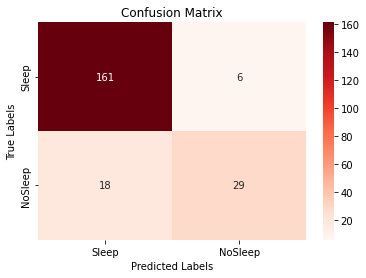

In [773]:
from sklearn.metrics import classification_report, confusion_matrix

cm=confusion_matrix(test_labels, stacking_pred, labels=[1,0])
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Reds', fmt='d')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Sleep','NoSleep'])
ax.yaxis.set_ticklabels(['Sleep','NoSleep'])

In [810]:
logistic_regression_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [815]:
# Initialize the meta model
meta_model1 = LogisticRegression()
meta_model2 = LogisticRegression()
meta_model3 = LogisticRegression()
meta_model4 = LogisticRegression()
meta_model5 = LogisticRegression()

# Generate predictions from base models for training data
logistic_regression_pred_train = logistic_regression.predict(train_features)
decision_tree_pred_train = decision_tree.predict(train_features)
random_forest_pred_train = random_forest.predict(train_features)
xgboost_pred_train = xgboost.predict(train_features)
lgbm_pred_train = lgbm_best.predict(train_features)

# Create a meta-training dataset
meta_train_X1 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train))

meta_train_X2 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 lgbm_pred_train))

meta_train_X3 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 
                                 xgboost_pred_train, lgbm_pred_train))

meta_train_X4 = np.column_stack((logistic_regression_pred_train,
                                 
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))

meta_train_X5 = np.column_stack((
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))


# Train the meta model on the meta-training dataset
meta_model1.fit(meta_train_X1, train_labels)
meta_model2.fit(meta_train_X2, train_labels)
meta_model3.fit(meta_train_X3, train_labels)
meta_model4.fit(meta_train_X4, train_labels)
meta_model5.fit(meta_train_X5, train_labels)

# Generate predictions from base models for testing data
logistic_regression_pred_test = logistic_regression.predict(test_features)
decision_tree_pred_test = decision_tree.predict(test_features)
random_forest_pred_test = random_forest.predict(test_features)
xgboost_pred_test = xgboost.predict(test_features)
lgbm_pred_test = lgbm_best.predict(test_features)

# Create a meta-testing dataset
meta_test_X1 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test))

meta_test_X2 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                lgbm_pred_test))

meta_test_X3 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                               
                                xgboost_pred_test, lgbm_pred_test))

meta_test_X4 = np.column_stack((logistic_regression_pred_test,
                                
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

meta_test_X5 = np.column_stack((
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

# Make predictions using the stacking ensemble
stacking_pred1 = meta_model1.predict(meta_test_X1)

stacking_pred2 = meta_model2.predict(meta_test_X2)

stacking_pred3 = meta_model3.predict(meta_test_X3)

stacking_pred4 = meta_model4.predict(meta_test_X4)

stacking_pred5 = meta_model5.predict(meta_test_X5)

# Calculate accuracy score of stacking ensemble
accuracy1 = accuracy_score(test_labels, stacking_pred1)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy1 * 100))

accuracy2 = accuracy_score(test_labels, stacking_pred2)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy2 * 100))

accuracy3 = accuracy_score(test_labels, stacking_pred3)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy3 * 100))

accuracy4 = accuracy_score(test_labels, stacking_pred4)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy4 * 100))

accuracy5 = accuracy_score(test_labels, stacking_pred5)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy5 * 100))

y_pred_meta1 = meta_model1.predict_proba(meta_test_X1)[:, 1]
mt_fpr1, mt_tpr1, threshold1 = roc_curve(test_labels, y_pred_meta1)

roc_auc = auc(mt_fpr1, mt_tpr1)
print(roc_auc)

y_pred_meta2 = meta_model2.predict_proba(meta_test_X2)[:, 1]
mt_fpr2, mt_tpr2, threshold1 = roc_curve(test_labels, y_pred_meta2)

roc_auc = auc(mt_fpr2, mt_tpr2)
print(roc_auc)

y_pred_meta3 = meta_model3.predict_proba(meta_test_X3)[:, 1]
mt_fpr3, mt_tpr3, threshold1 = roc_curve(test_labels, y_pred_meta3)

roc_auc = auc(mt_fpr3, mt_tpr3)
print(roc_auc)

y_pred_meta4 = meta_model4.predict_proba(meta_test_X4)[:, 1]
mt_fpr4, mt_tpr4, threshold1 = roc_curve(test_labels, y_pred_meta4)

roc_auc = auc(mt_fpr1, mt_tpr1)
print(roc_auc)

y_pred_meta5 = meta_model5.predict_proba(meta_test_X5)[:, 1]
mt_fpr5, mt_tpr5, threshold1 = roc_curve(test_labels, y_pred_meta5)

roc_auc = auc(mt_fpr5, mt_tpr5)
print(roc_auc)

Accuracy of stacking ensemble: 89.72%
Accuracy of stacking ensemble: 84.11%
Accuracy of stacking ensemble: 84.11%
Accuracy of stacking ensemble: 84.11%
Accuracy of stacking ensemble: 84.11%
0.8767995923047522
0.8638680086635241
0.8838068543763535
0.8767995923047522
0.8856542234679577


In [832]:
# Initialize the meta model
meta_model = LogisticRegression()

# Generate predictions from base models for training data
meta_model1_pred_train = meta_model1.predict(meta_train_X1)
meta_model2_pred_train = meta_model2.predict(meta_train_X2)
meta_model3_pred_train = meta_model3.predict(meta_train_X3)
meta_model4_pred_train = meta_model4.predict(meta_train_X4)
meta_model5_pred_train = meta_model5.predict(meta_train_X5)

# Create a meta-training dataset
meta_train_X = np.column_stack((meta_model1_pred_train,
                                 meta_model2_pred_train,
                                 meta_model3_pred_train,
                                 meta_model4_pred_train, meta_model5_pred_train))

# Train the meta model on the meta-training dataset
meta_model.fit(meta_train_X, train_labels)

# Generate predictions from base models for testing data
meta_model1_pred_test = meta_model1.predict(meta_test_X1)
meta_model2_pred_test = meta_model2.predict(meta_test_X2)
meta_model3_pred_test = meta_model3.predict(meta_test_X3)
meta_model4_pred_test = meta_model4.predict(meta_test_X4)
meta_model5_pred_test = meta_model5.predict(meta_test_X5)

# Create a meta-testing dataset
meta_test_X = np.column_stack((meta_model1_pred_test,
                                meta_model2_pred_test,
                                meta_model3_pred_test,
                                meta_model4_pred_test, meta_model5_pred_test))

# Make predictions using the stacking ensemble
stacking_pred = meta_model.predict(meta_test_X)

# Calculate accuracy score of stacking ensemble
accuracy = accuracy_score(test_labels, stacking_pred)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy * 100))

y_pred_meta = meta_model.predict_proba(meta_test_X)[:, 1]
mt_fpr, mt_tpr, threshold1 = roc_curve(test_labels, y_pred_meta)

roc_auc = auc(mt_fpr, mt_tpr)
print(roc_auc)

Accuracy of stacking ensemble: 84.11%
0.8311249840744044


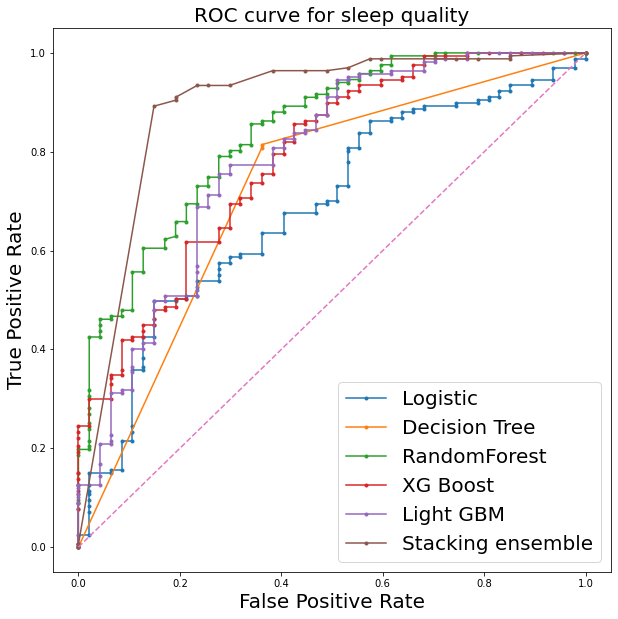

In [831]:
### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(lr_fpr, lr_tpr, marker = '.', label = "Logistic")
plt.plot(dt_fpr, dt_tpr, marker = '.', label = "Decision Tree")
plt.plot(rf_fpr, rf_tpr, marker = '.', label = "RandomForest")
plt.plot(xgb_fpr, xgb_tpr, marker = '.', label = "XG Boost")
plt.plot(lgbm_fpr, lgbm_tpr, marker = '.', label = "Light GBM")
plt.plot(mt_fpr, mt_tpr, marker = '.', label = "Stacking ensemble")
plt.plot(random_fpr, random_tpr, linestyle = '--')



plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve for sleep quality", size = 20)
plt.show()

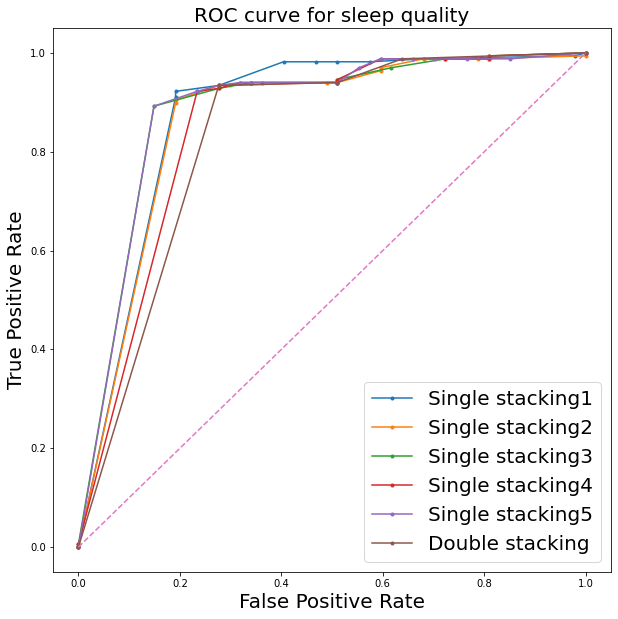

In [833]:
### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(mt_fpr1, mt_tpr1, marker = '.', label = "Single stacking1")
plt.plot(mt_fpr2, mt_tpr2, marker = '.', label = "Single stacking2")
plt.plot(mt_fpr3, mt_tpr3, marker = '.', label = "Single stacking3")
plt.plot(mt_fpr4, mt_tpr4, marker = '.', label = "Single stacking4")
plt.plot(mt_fpr5, mt_tpr5, marker = '.', label = "Single stacking5")
plt.plot(mt_fpr, mt_tpr, marker = '.', label = "Double stacking")
plt.plot(random_fpr, random_tpr, linestyle = '--')



plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve for sleep quality", size = 20)
plt.show()

#2 sleepProblem

In [26]:
sleep=final['sleepProblem'].apply(lambda x: 0 if x==0 else 1)

In [27]:
sleep.value_counts()

0    596
1    473
Name: sleepProblem, dtype: int64

In [28]:
sleep=sleep.reset_index(drop=True)

In [29]:
feature

,walk,exer,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
0,45,0,4.0,4.0,1,1,1,27,-0.013653,3.103176,86.727616,33.021747,0.000000
1,30,0,5.0,4.0,1,1,1,27,0.056283,2.503302,87.789920,34.441982,0.000000
2,20,0,5.0,2.0,1,1,1,27,0.036912,3.373406,85.270147,33.193400,0.000000
3,20,0,3.0,2.0,0,0,1,27,0.009140,1.663482,89.475536,34.086428,0.000000
4,35,0,4.0,4.0,1,1,1,27,-0.004555,0.773490,88.103819,34.190778,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,81,4,3.0,2.0,0,0,1,24,0.000718,0.120715,88.643042,35.732362,0.000000
1065,89,0,3.0,2.0,0,0,1,24,-0.002291,0.206694,78.212777,35.668583,0.000000
1066,140,0,3.0,3.0,1,0,1,24,0.000417,0.693704,84.231193,35.719695,0.000000
1067,17,0,3.0,3.0,1,0,1,24,-0.007869,0.430001,82.935526,35.455277,166.408832


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train_features, test_features, train_labels, test_labels= train_test_split(feature,sleep,stratify=sleep, test_size=0.2, shuffle=True)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [32]:
train_features=pd.DataFrame(train_features, columns=feature.columns)

In [33]:
test_features=pd.DataFrame(test_features, columns=feature.columns)

In [34]:
train_features.agg(['mean','std']).round(2)

,walk,exer,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
mean,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [35]:
lr = LogisticRegression()
lr.fit(train_features, train_labels)

LogisticRegression()

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Regularization strength
    'penalty': ['l1', 'l2']      # Regularization type
}

# Create a k-fold cross-validation object with k=5
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an instance of GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lr, param_grid, cv=kfold)

# Perform hyperparameter tuning with k-fold cross-validation on the training set
grid_search.fit(train_features, train_labels)

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Train the model with the best hyperparameters on the entire training set
lr = grid_search.best_estimator_
lr.fit(test_features, test_labels)

# Evaluate the best model on the testing set
test_accuracy = lr.score(test_features, test_labels)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Best Hyperparameters:
{'C': 0.01, 'penalty': 'l2'}
Testing Accuracy: 0.6121


C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, r2_score, accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score, confusion_matrix, classification_report, roc_auc_score, auc

In [38]:
print(lr.score(test_features, test_labels))

0.6121495327102804


In [64]:
probs = lr.predict_proba(test_features)[:,1]
lr_fpr, lr_tpr, threshold1 = roc_curve(test_labels, probs)

In [39]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=kfold)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Decision Tree classifier with the best hyperparameters
dt = DecisionTreeClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
dt.fit(train_features, train_labels)

# Make predictions
y_pred = dt.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = dt.predict_proba(test_features)[:,1]
dt_fpr, dt_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 0.7570093457943925


In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
rf = RandomForestClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
rf.fit(train_features, train_labels)

# Make predictions
y_pred = rf.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = rf.predict_proba(test_features)[:,1]
rf_fpr, rf_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 0.794392523364486


In [42]:
import xgboost as xgb

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Create an instance of the XGBoost classifier
xgb_model = xgb.XGBClassifier()

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an instance of GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10)

# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
xgb = xgb.XGBClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
xgb.fit(train_features, train_labels)

# Make predictions
y_pred = xgb.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = xgb.predict_proba(test_features)[:,1]
xgb_fpr, xgb_tpr, threshold1 = roc_curve(test_labels, probs)

Best Hyperparameters:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'subsample': 1.0}
Best Accuracy:  0.7204377564979481
Accuracy: 0.7757009345794392


In [54]:
lgbm_best = LGBMClassifier(**best_params)

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

# Define hyperparameter grid for tuning
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [31, 63],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'objective': ['binary'],
    'reg_alpha': [0.0, 0.1, 0.2],
    'reg_lambda': [0.0, 0.1, 0.2],
    'n_jobs': [-1],
    'silent': [True]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the LightGBM classifier with the best hyperparameters
lgbm_best = LGBMClassifier(**best_params)
lgbm_best.fit(train_labels, train_labels)

# Predict on the testing set
y_pred = lgbm_best.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [56]:
lgbm_best.fit(train_features, train_labels)

C:\Users\pc\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(boosting_type='dart', learning_rate=0.2, max_depth=5,
               n_estimators=200, objective='binary', reg_alpha=0.1,
               reg_lambda=0.2, silent=True)

In [44]:
lgbm_best.fit(train_features, train_labels)

# Predict on the testing set
y_pred = lgbm_best.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

probs = lgbm_best.predict_proba(test_features)[:,1]
lgbm_fpr, lgbm_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 78.50%


C:\Users\pc\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


In [58]:
# Initialize the meta model
meta_model = LogisticRegression()

# Generate predictions from base models for training data
logistic_regression_pred_train = lr.predict(train_features)
decision_tree_pred_train = dt.predict(train_features)
random_forest_pred_train = rf.predict(train_features)
xgboost_pred_train = xgb.predict(train_features)
lgbm_pred_train = lgbm_best.predict(train_features)

# Create a meta-training dataset
meta_train_X = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))

# Train the meta model on the meta-training dataset
meta_model.fit(meta_train_X, train_labels)

# Generate predictions from base models for testing data
logistic_regression_pred_test = lr.predict(test_features)
decision_tree_pred_test = dt.predict(test_features)
random_forest_pred_test = rf.predict(test_features)
xgboost_pred_test = xgb.predict(test_features)
lgbm_pred_test = lgbm_best.predict(test_features)

# Create a meta-testing dataset
meta_test_X = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

# Make predictions using the stacking ensemble
stacking_pred = meta_model.predict(meta_test_X)

# Calculate accuracy score of stacking ensemble
accuracy = accuracy_score(test_labels, stacking_pred)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy * 100))

Accuracy of stacking ensemble: 78.97%


In [59]:
y_pred_meta = meta_model.predict_proba(meta_test_X)[:, 1]

In [60]:
mt_fpr, mt_tpr, threshold1 = roc_curve(test_labels, y_pred_meta)

In [61]:
roc_auc = auc(mt_fpr, mt_tpr)
print(roc_auc)

0.8333480760725341


[Text(0, 0.5, 'Sleep'), Text(0, 1.5, 'NoSleep')]

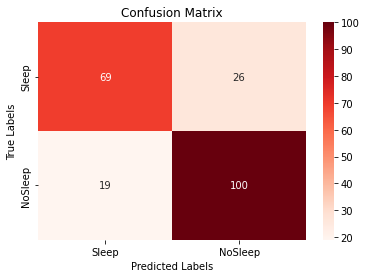

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

cm=confusion_matrix(test_labels, stacking_pred, labels=[1,0])
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Reds', fmt='d')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Sleep','NoSleep'])
ax.yaxis.set_ticklabels(['Sleep','NoSleep'])

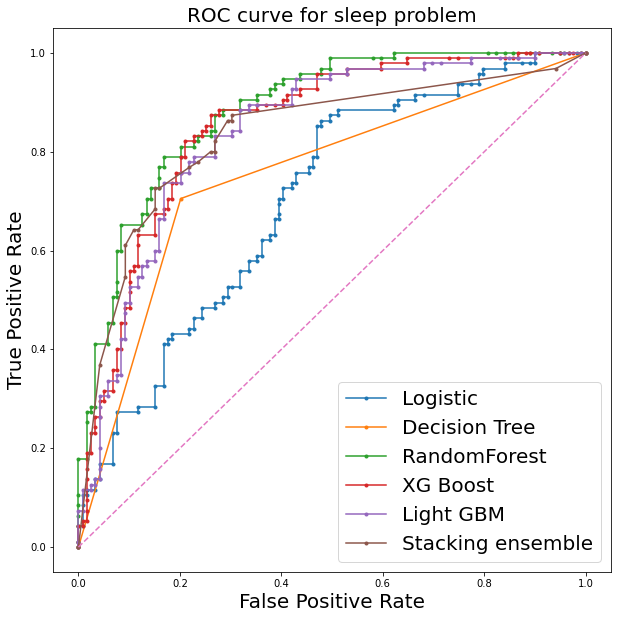

In [65]:
### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(lr_fpr, lr_tpr, marker = '.', label = "Logistic")
plt.plot(dt_fpr, dt_tpr, marker = '.', label = "Decision Tree")
plt.plot(rf_fpr, rf_tpr, marker = '.', label = "RandomForest")
plt.plot(xgb_fpr, xgb_tpr, marker = '.', label = "XG Boost")
plt.plot(lgbm_fpr, lgbm_tpr, marker = '.', label = "Light GBM")
plt.plot(mt_fpr, mt_tpr, marker = '.', label = "Stacking ensemble")
plt.plot(random_fpr, random_tpr, linestyle = '--')



plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve for sleep problem", size = 20)
plt.show()

In [66]:
# Initialize the meta model
meta_model1 = LogisticRegression()
meta_model2 = LogisticRegression()
meta_model3 = LogisticRegression()
meta_model4 = LogisticRegression()
meta_model5 = LogisticRegression()

# Generate predictions from base models for training data
logistic_regression_pred_train = lr.predict(train_features)
decision_tree_pred_train = dt.predict(train_features)
random_forest_pred_train = rf.predict(train_features)
xgboost_pred_train = xgb.predict(train_features)
lgbm_pred_train = lgbm_best.predict(train_features)

# Create a meta-training dataset
meta_train_X1 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train))

meta_train_X2 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 lgbm_pred_train))

meta_train_X3 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 
                                 xgboost_pred_train, lgbm_pred_train))

meta_train_X4 = np.column_stack((logistic_regression_pred_train,
                                 
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))

meta_train_X5 = np.column_stack((
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))


# Train the meta model on the meta-training dataset
meta_model1.fit(meta_train_X1, train_labels)
meta_model2.fit(meta_train_X2, train_labels)
meta_model3.fit(meta_train_X3, train_labels)
meta_model4.fit(meta_train_X4, train_labels)
meta_model5.fit(meta_train_X5, train_labels)

# Generate predictions from base models for testing data
logistic_regression_pred_test = lr.predict(test_features)
decision_tree_pred_test = dt.predict(test_features)
random_forest_pred_test = rf.predict(test_features)
xgboost_pred_test = xgb.predict(test_features)
lgbm_pred_test = lgbm_best.predict(test_features)

# Create a meta-testing dataset
meta_test_X1 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test))

meta_test_X2 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                lgbm_pred_test))

meta_test_X3 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                               
                                xgboost_pred_test, lgbm_pred_test))

meta_test_X4 = np.column_stack((logistic_regression_pred_test,
                                
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

meta_test_X5 = np.column_stack((
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

# Make predictions using the stacking ensemble
stacking_pred1 = meta_model1.predict(meta_test_X1)

stacking_pred2 = meta_model2.predict(meta_test_X2)

stacking_pred3 = meta_model3.predict(meta_test_X3)

stacking_pred4 = meta_model4.predict(meta_test_X4)

stacking_pred5 = meta_model5.predict(meta_test_X5)

# Calculate accuracy score of stacking ensemble
accuracy1 = accuracy_score(test_labels, stacking_pred1)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy1 * 100))

accuracy2 = accuracy_score(test_labels, stacking_pred2)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy2 * 100))

accuracy3 = accuracy_score(test_labels, stacking_pred3)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy3 * 100))

accuracy4 = accuracy_score(test_labels, stacking_pred4)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy4 * 100))

accuracy5 = accuracy_score(test_labels, stacking_pred5)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy5 * 100))

y_pred_meta1 = meta_model1.predict_proba(meta_test_X1)[:, 1]
mt_fpr1, mt_tpr1, threshold1 = roc_curve(test_labels, y_pred_meta1)

roc_auc = auc(mt_fpr1, mt_tpr1)
print(roc_auc)

y_pred_meta2 = meta_model2.predict_proba(meta_test_X2)[:, 1]
mt_fpr2, mt_tpr2, threshold1 = roc_curve(test_labels, y_pred_meta2)

roc_auc = auc(mt_fpr2, mt_tpr2)
print(roc_auc)

y_pred_meta3 = meta_model3.predict_proba(meta_test_X3)[:, 1]
mt_fpr3, mt_tpr3, threshold1 = roc_curve(test_labels, y_pred_meta3)

roc_auc = auc(mt_fpr3, mt_tpr3)
print(roc_auc)

y_pred_meta4 = meta_model4.predict_proba(meta_test_X4)[:, 1]
mt_fpr4, mt_tpr4, threshold1 = roc_curve(test_labels, y_pred_meta4)

roc_auc = auc(mt_fpr1, mt_tpr1)
print(roc_auc)

y_pred_meta5 = meta_model5.predict_proba(meta_test_X5)[:, 1]
mt_fpr5, mt_tpr5, threshold1 = roc_curve(test_labels, y_pred_meta5)

roc_auc = auc(mt_fpr5, mt_tpr5)
print(roc_auc)

Accuracy of stacking ensemble: 78.97%
Accuracy of stacking ensemble: 76.17%
Accuracy of stacking ensemble: 77.10%
Accuracy of stacking ensemble: 78.50%
Accuracy of stacking ensemble: 79.44%
0.8337019018133568
0.832330827067669
0.811233967271119
0.8337019018133568
0.8354710305174702


In [67]:
# Initialize the meta model
meta_model = LogisticRegression()

# Generate predictions from base models for training data
meta_model1_pred_train = meta_model1.predict(meta_train_X1)
meta_model2_pred_train = meta_model2.predict(meta_train_X2)
meta_model3_pred_train = meta_model3.predict(meta_train_X3)
meta_model4_pred_train = meta_model4.predict(meta_train_X4)
meta_model5_pred_train = meta_model5.predict(meta_train_X5)

# Create a meta-training dataset
meta_train_X = np.column_stack((meta_model1_pred_train,
                                 meta_model2_pred_train,
                                 meta_model3_pred_train,
                                 meta_model4_pred_train, meta_model5_pred_train))

# Train the meta model on the meta-training dataset
meta_model.fit(meta_train_X, train_labels)

# Generate predictions from base models for testing data
meta_model1_pred_test = meta_model1.predict(meta_test_X1)
meta_model2_pred_test = meta_model2.predict(meta_test_X2)
meta_model3_pred_test = meta_model3.predict(meta_test_X3)
meta_model4_pred_test = meta_model4.predict(meta_test_X4)
meta_model5_pred_test = meta_model5.predict(meta_test_X5)

# Create a meta-testing dataset
meta_test_X = np.column_stack((meta_model1_pred_test,
                                meta_model2_pred_test,
                                meta_model3_pred_test,
                                meta_model4_pred_test, meta_model5_pred_test))

# Make predictions using the stacking ensemble
stacking_pred = meta_model.predict(meta_test_X)

# Calculate accuracy score of stacking ensemble
accuracy = accuracy_score(test_labels, stacking_pred)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy * 100))

y_pred_meta = meta_model.predict_proba(meta_test_X)[:, 1]
mt_fpr, mt_tpr, threshold1 = roc_curve(test_labels, y_pred_meta)

roc_auc = auc(mt_fpr, mt_tpr)
print(roc_auc)

Accuracy of stacking ensemble: 78.04%
0.7973463069438301


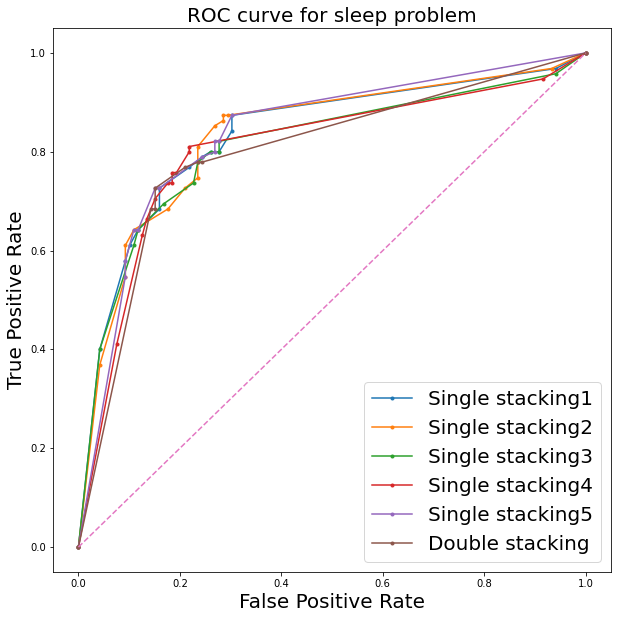

In [69]:
### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(mt_fpr1, mt_tpr1, marker = '.', label = "Single stacking1")
plt.plot(mt_fpr2, mt_tpr2, marker = '.', label = "Single stacking2")
plt.plot(mt_fpr3, mt_tpr3, marker = '.', label = "Single stacking3")
plt.plot(mt_fpr4, mt_tpr4, marker = '.', label = "Single stacking4")
plt.plot(mt_fpr5, mt_tpr5, marker = '.', label = "Single stacking5")
plt.plot(mt_fpr, mt_tpr, marker = '.', label = "Double stacking")
plt.plot(random_fpr, random_tpr, linestyle = '--')



plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve for sleep problem", size = 20)
plt.show()

In [115]:
#3 dream

In [70]:
sleep=final['dream'].apply(lambda x: 1 if x==1 else 0)

In [669]:
final['sleep'].value_counts()

4.0    441
3.0    312
2.0    200
5.0     82
1.0     34
Name: sleep, dtype: int64

In [670]:
sleep.value_counts()

1    835
0    234
Name: sleep, dtype: int64

In [71]:
sleep=sleep.reset_index(drop=True)

In [72]:
feature

,walk,exer,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
0,45,0,4.0,4.0,1,1,1,27,-0.013653,3.103176,86.727616,33.021747,0.000000
1,30,0,5.0,4.0,1,1,1,27,0.056283,2.503302,87.789920,34.441982,0.000000
2,20,0,5.0,2.0,1,1,1,27,0.036912,3.373406,85.270147,33.193400,0.000000
3,20,0,3.0,2.0,0,0,1,27,0.009140,1.663482,89.475536,34.086428,0.000000
4,35,0,4.0,4.0,1,1,1,27,-0.004555,0.773490,88.103819,34.190778,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,81,4,3.0,2.0,0,0,1,24,0.000718,0.120715,88.643042,35.732362,0.000000
1065,89,0,3.0,2.0,0,0,1,24,-0.002291,0.206694,78.212777,35.668583,0.000000
1066,140,0,3.0,3.0,1,0,1,24,0.000417,0.693704,84.231193,35.719695,0.000000
1067,17,0,3.0,3.0,1,0,1,24,-0.007869,0.430001,82.935526,35.455277,166.408832


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train_features, test_features, train_labels, test_labels= train_test_split(feature,sleep,stratify=sleep, test_size=0.2, shuffle=True)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [75]:
train_features=pd.DataFrame(train_features, columns=feature.columns)

In [76]:
test_features=pd.DataFrame(test_features, columns=feature.columns)

In [77]:
train_features.agg(['mean','std']).round(2)

,walk,exer,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
mean,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [78]:
lr = LogisticRegression()
lr.fit(train_features, train_labels)

LogisticRegression()

In [79]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Regularization strength
    'penalty': ['l1', 'l2']      # Regularization type
}

# Create a k-fold cross-validation object with k=5
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an instance of GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lr, param_grid, cv=kfold)

# Perform hyperparameter tuning with k-fold cross-validation on the training set
grid_search.fit(train_features, train_labels)

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Train the model with the best hyperparameters on the entire training set
lr = grid_search.best_estimator_
lr.fit(test_features, test_labels)

# Evaluate the best model on the testing set
test_accuracy = lr.score(test_features, test_labels)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Best Hyperparameters:
{'C': 0.001, 'penalty': 'l2'}
Testing Accuracy: 0.9626


C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, r2_score, accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score, confusion_matrix, classification_report, roc_auc_score, auc

In [81]:
print(lr.score(test_features, test_labels))

0.9626168224299065


In [82]:
clf = DecisionTreeClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=kfold)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Decision Tree classifier with the best hyperparameters
dt = DecisionTreeClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
dt.fit(train_features, train_labels)

# Make predictions
y_pred = dt.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = dt.predict_proba(test_features)[:,1]
dt_fpr, dt_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 0.9532710280373832


In [83]:
clf = RandomForestClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
rf = RandomForestClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
rf.fit(train_features, train_labels)

# Make predictions
y_pred = rf.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = rf.predict_proba(test_features)[:,1]
rf_fpr, rf_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 0.9626168224299065


In [84]:
import xgboost as xgb

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Create an instance of the XGBoost classifier
xgb_model = xgb.XGBClassifier()

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an instance of GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10)

# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
xgb = xgb.XGBClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
xgb.fit(train_features, train_labels)

# Make predictions
y_pred = xgb.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = xgb.predict_proba(test_features)[:,1]
xgb_fpr, xgb_tpr, threshold1 = roc_curve(test_labels, probs)

Best Hyperparameters:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.8}
Best Accuracy:  0.9684404924760601
Accuracy: 0.9626168224299065


In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

# Define hyperparameter grid for tuning
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [31, 63],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'objective': ['binary'],
    'reg_alpha': [0.0, 0.1, 0.2],
    'reg_lambda': [0.0, 0.1, 0.2],
    'n_jobs': [-1],
    'silent': [True]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the LightGBM classifier with the best hyperparameters
lgbm_best = LGBMClassifier(**best_params)
lgbm_best.fit(train_labels, train_labels)

# Predict on the testing set
y_pred = lgbm_best.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [85]:
lgbm_best.fit(train_features, train_labels)

# Predict on the testing set
y_pred = lgbm_best.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

probs = lgbm_best.predict_proba(test_features)[:,1]
lgbm_fpr, lgbm_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 94.39%


C:\Users\pc\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


In [794]:
stacking_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [793]:
probs

array([0.95924906, 0.93564804, 0.25646566, 0.99094986, 0.87128606,
       0.96874236, 0.97702064, 0.99019274, 0.91494623, 0.39012982,
       0.06999261, 0.94314665, 0.82781167, 0.97326681, 0.98016794,
       0.98521892, 0.76296837, 0.9431974 , 0.89879247, 0.52173726,
       0.76942572, 0.34912373, 0.87606128, 0.93696986, 0.63629192,
       0.82136094, 0.83384831, 0.98240215, 0.94628343, 0.62367385,
       0.25152885, 0.94531185, 0.95523077, 0.99430253, 0.58648059,
       0.97360665, 0.76565319, 0.94618097, 0.11068171, 0.88494877,
       0.39196825, 0.9645753 , 0.99427579, 0.7620071 , 0.79813246,
       0.97213665, 0.97362734, 0.06999261, 0.95154111, 0.94743673,
       0.90855003, 0.90769343, 0.39644685, 0.94813763, 0.93166876,
       0.87819196, 0.99046815, 0.93337527, 0.98410621, 0.30738034,
       0.25646566, 0.46356979, 0.83030132, 0.092644  , 0.98604146,
       0.94314665, 0.97318523, 0.95356328, 0.91220138, 0.79896795,
       0.91488423, 0.98670387, 0.92828   , 0.97733059, 0.93067

In [87]:
# Initialize the meta model
meta_model = LogisticRegression()

# Generate predictions from base models for training data
logistic_regression_pred_train = lr.predict(train_features)
decision_tree_pred_train = dt.predict(train_features)
random_forest_pred_train = rf.predict(train_features)
xgboost_pred_train = xgb.predict(train_features)
lgbm_pred_train = lgbm_best.predict(train_features)

# Create a meta-training dataset
meta_train_X = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))

# Train the meta model on the meta-training dataset
meta_model.fit(meta_train_X, train_labels)

# Generate predictions from base models for testing data
logistic_regression_pred_test = lr.predict(test_features)
decision_tree_pred_test = dt.predict(test_features)
random_forest_pred_test = rf.predict(test_features)
xgboost_pred_test = xgb.predict(test_features)
lgbm_pred_test = lgbm_best.predict(test_features)

# Create a meta-testing dataset
meta_test_X = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

# Make predictions using the stacking ensemble
stacking_pred = meta_model.predict(meta_test_X)

# Calculate accuracy score of stacking ensemble
accuracy = accuracy_score(test_labels, stacking_pred)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy * 100))

Accuracy of stacking ensemble: 96.26%


In [88]:
y_pred_meta = meta_model.predict_proba(meta_test_X)[:, 1]

In [89]:
mt_fpr, mt_tpr, threshold1 = roc_curve(test_labels, y_pred_meta)

In [90]:
roc_auc = auc(mt_fpr, mt_tpr)
print(roc_auc)

0.6080097087378641


[Text(0, 0.5, 'Sleep'), Text(0, 1.5, 'NoSleep')]

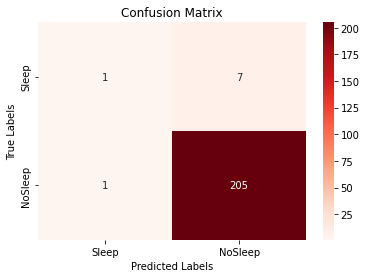

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

cm=confusion_matrix(test_labels, stacking_pred, labels=[1,0])
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Reds', fmt='d')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Sleep','NoSleep'])
ax.yaxis.set_ticklabels(['Sleep','NoSleep'])

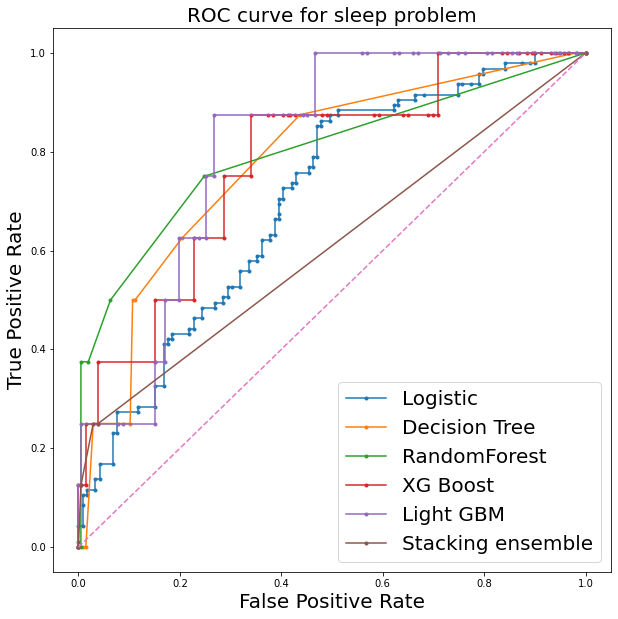

In [93]:
### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(lr_fpr, lr_tpr, marker = '.', label = "Logistic")
plt.plot(dt_fpr, dt_tpr, marker = '.', label = "Decision Tree")
plt.plot(rf_fpr, rf_tpr, marker = '.', label = "RandomForest")
plt.plot(xgb_fpr, xgb_tpr, marker = '.', label = "XG Boost")
plt.plot(lgbm_fpr, lgbm_tpr, marker = '.', label = "Light GBM")
plt.plot(mt_fpr, mt_tpr, marker = '.', label = "Stacking ensemble")
plt.plot(random_fpr, random_tpr, linestyle = '--')



plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve for sleep problem", size = 20)
plt.show()

In [95]:
# Initialize the meta model
meta_model1 = LogisticRegression()
meta_model2 = LogisticRegression()
meta_model3 = LogisticRegression()
meta_model4 = LogisticRegression()
meta_model5 = LogisticRegression()

# Generate predictions from base models for training data
logistic_regression_pred_train = lr.predict(train_features)
decision_tree_pred_train = dt.predict(train_features)
random_forest_pred_train = rf.predict(train_features)
xgboost_pred_train = xgb.predict(train_features)
lgbm_pred_train = lgbm_best.predict(train_features)

# Create a meta-training dataset
meta_train_X1 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train))

meta_train_X2 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 lgbm_pred_train))

meta_train_X3 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 
                                 xgboost_pred_train, lgbm_pred_train))

meta_train_X4 = np.column_stack((logistic_regression_pred_train,
                                 
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))

meta_train_X5 = np.column_stack((
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))


# Train the meta model on the meta-training dataset
meta_model1.fit(meta_train_X1, train_labels)
meta_model2.fit(meta_train_X2, train_labels)
meta_model3.fit(meta_train_X3, train_labels)
meta_model4.fit(meta_train_X4, train_labels)
meta_model5.fit(meta_train_X5, train_labels)

# Generate predictions from base models for testing data
logistic_regression_pred_test = lr.predict(test_features)
decision_tree_pred_test = dt.predict(test_features)
random_forest_pred_test = rf.predict(test_features)
xgboost_pred_test = xgb.predict(test_features)
lgbm_pred_test = lgbm_best.predict(test_features)

# Create a meta-testing dataset
meta_test_X1 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test))

meta_test_X2 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                lgbm_pred_test))

meta_test_X3 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                               
                                xgboost_pred_test, lgbm_pred_test))

meta_test_X4 = np.column_stack((logistic_regression_pred_test,
                                
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

meta_test_X5 = np.column_stack((
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

# Make predictions using the stacking ensemble
stacking_pred1 = meta_model1.predict(meta_test_X1)

stacking_pred2 = meta_model2.predict(meta_test_X2)

stacking_pred3 = meta_model3.predict(meta_test_X3)

stacking_pred4 = meta_model4.predict(meta_test_X4)

stacking_pred5 = meta_model5.predict(meta_test_X5)

# Calculate accuracy score of stacking ensemble
accuracy1 = accuracy_score(test_labels, stacking_pred1)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy1 * 100))

accuracy2 = accuracy_score(test_labels, stacking_pred2)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy2 * 100))

accuracy3 = accuracy_score(test_labels, stacking_pred3)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy3 * 100))

accuracy4 = accuracy_score(test_labels, stacking_pred4)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy4 * 100))

accuracy5 = accuracy_score(test_labels, stacking_pred5)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy5 * 100))

y_pred_meta1 = meta_model1.predict_proba(meta_test_X1)[:, 1]
mt_fpr1, mt_tpr1, threshold1 = roc_curve(test_labels, y_pred_meta1)

roc_auc = auc(mt_fpr1, mt_tpr1)
print(roc_auc)

y_pred_meta2 = meta_model2.predict_proba(meta_test_X2)[:, 1]
mt_fpr2, mt_tpr2, threshold1 = roc_curve(test_labels, y_pred_meta2)

roc_auc = auc(mt_fpr2, mt_tpr2)
print(roc_auc)

y_pred_meta3 = meta_model3.predict_proba(meta_test_X3)[:, 1]
mt_fpr3, mt_tpr3, threshold1 = roc_curve(test_labels, y_pred_meta3)

roc_auc = auc(mt_fpr3, mt_tpr3)
print(roc_auc)

y_pred_meta4 = meta_model4.predict_proba(meta_test_X4)[:, 1]
mt_fpr4, mt_tpr4, threshold1 = roc_curve(test_labels, y_pred_meta4)

roc_auc = auc(mt_fpr1, mt_tpr1)
print(roc_auc)

y_pred_meta5 = meta_model5.predict_proba(meta_test_X5)[:, 1]
mt_fpr5, mt_tpr5, threshold1 = roc_curve(test_labels, y_pred_meta5)

roc_auc = auc(mt_fpr5, mt_tpr5)
print(roc_auc)

Accuracy of stacking ensemble: 96.26%
Accuracy of stacking ensemble: 94.39%
Accuracy of stacking ensemble: 96.26%
Accuracy of stacking ensemble: 96.26%
Accuracy of stacking ensemble: 96.26%
0.5558252427184467
0.6080097087378641
0.6080097087378641
0.5558252427184467
0.6080097087378641


In [96]:
# Initialize the meta model
meta_model = LogisticRegression()

# Generate predictions from base models for training data
meta_model1_pred_train = meta_model1.predict(meta_train_X1)
meta_model2_pred_train = meta_model2.predict(meta_train_X2)
meta_model3_pred_train = meta_model3.predict(meta_train_X3)
meta_model4_pred_train = meta_model4.predict(meta_train_X4)
meta_model5_pred_train = meta_model5.predict(meta_train_X5)

# Create a meta-training dataset
meta_train_X = np.column_stack((meta_model1_pred_train,
                                 meta_model2_pred_train,
                                 meta_model3_pred_train,
                                 meta_model4_pred_train, meta_model5_pred_train))

# Train the meta model on the meta-training dataset
meta_model.fit(meta_train_X, train_labels)

# Generate predictions from base models for testing data
meta_model1_pred_test = meta_model1.predict(meta_test_X1)
meta_model2_pred_test = meta_model2.predict(meta_test_X2)
meta_model3_pred_test = meta_model3.predict(meta_test_X3)
meta_model4_pred_test = meta_model4.predict(meta_test_X4)
meta_model5_pred_test = meta_model5.predict(meta_test_X5)

# Create a meta-testing dataset
meta_test_X = np.column_stack((meta_model1_pred_test,
                                meta_model2_pred_test,
                                meta_model3_pred_test,
                                meta_model4_pred_test, meta_model5_pred_test))

# Make predictions using the stacking ensemble
stacking_pred = meta_model.predict(meta_test_X)

# Calculate accuracy score of stacking ensemble
accuracy = accuracy_score(test_labels, stacking_pred)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy * 100))

y_pred_meta = meta_model.predict_proba(meta_test_X)[:, 1]
mt_fpr, mt_tpr, threshold1 = roc_curve(test_labels, y_pred_meta)

roc_auc = auc(mt_fpr, mt_tpr)
print(roc_auc)

Accuracy of stacking ensemble: 96.26%
0.6116504854368932


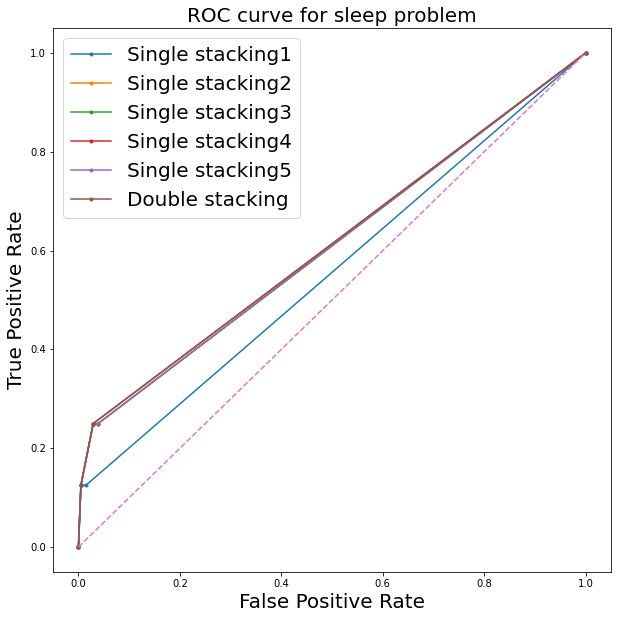

In [97]:
### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(mt_fpr1, mt_tpr1, marker = '.', label = "Single stacking1")
plt.plot(mt_fpr2, mt_tpr2, marker = '.', label = "Single stacking2")
plt.plot(mt_fpr3, mt_tpr3, marker = '.', label = "Single stacking3")
plt.plot(mt_fpr4, mt_tpr4, marker = '.', label = "Single stacking4")
plt.plot(mt_fpr5, mt_tpr5, marker = '.', label = "Single stacking5")
plt.plot(mt_fpr, mt_tpr, marker = '.', label = "Double stacking")
plt.plot(random_fpr, random_tpr, linestyle = '--')



plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve for sleep problem", size = 20)
plt.show()

In [75]:
final['dream'].value_counts()

4.0    659
2.0    310
3.0     59
1.0     41
Name: dream, dtype: int64

In [47]:
scaler = StandardScaler()
train_features, test_features, train_labels, test_labels= train_test_split(feature,sleep,stratify=sleep, test_size=0.2, shuffle=True)

In [48]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [49]:
train_features=pd.DataFrame(train_features, columns=feature.columns)

In [50]:
test_features=pd.DataFrame(test_features, columns=feature.columns)

In [51]:
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

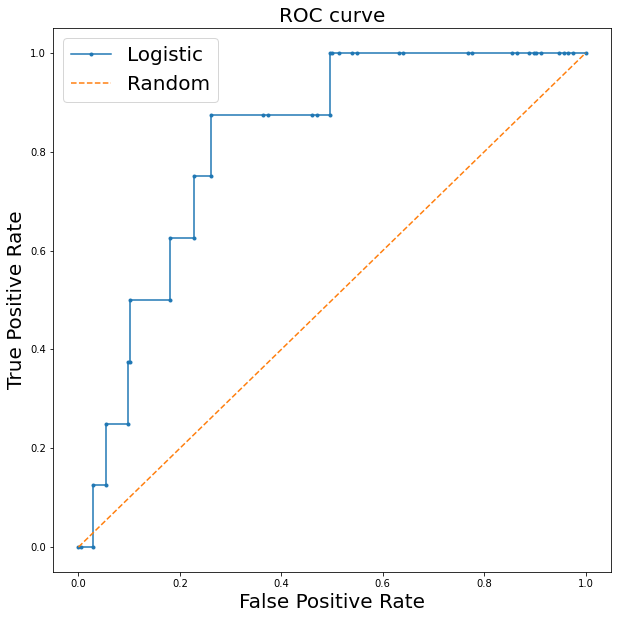



 ROC AUC score :  0.8191747572815534
[[  0   8]
 [  0 206]]
accuracy score: 0.9626168224299065
precision score: 0.0
recall score: 0.0
f1 score: 0.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       206
           1       0.00      0.00      0.00         8

    accuracy                           0.96       214
   macro avg       0.48      0.50      0.49       214
weighted avg       0.93      0.96      0.94       214



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Unde

In [52]:
### roc curve 패키지로 fpr, tpr 뽑기
y_pred=model.predict(test_features)
probs = model.predict_proba(test_features)[:,1]
model_fpr, model_tpr, threshold1 = roc_curve(test_labels, probs)

### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(model_fpr, model_tpr, marker = '.', label = "Logistic")
plt.plot(random_fpr, random_tpr, linestyle = '--', label = "Random")

plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve", size = 20)
plt.show()


### AUC 값 확인하기 (ROC curve 아래 부분 면적)
roc_auc = auc(model_fpr, model_tpr)
print("\n\n ROC AUC score : ", roc_auc)
print(confusion_matrix(test_labels, y_pred, labels=[1,0]))
print('accuracy score:', accuracy_score(test_labels, y_pred))
print('precision score:',precision_score(test_labels, y_pred, pos_label=1))
print('recall score:', recall_score(test_labels, y_pred, pos_label=1))
print('f1 score:', f1_score(test_labels, y_pred, pos_label=1))
print(classification_report(test_labels, y_pred))

In [53]:
print(model.score(test_features, test_labels))

0.9626168224299065


In [54]:
#4 amCondition

In [98]:
sleep=final['amCondition'].apply(lambda x: 0 if x==1 or x==2 else 1)

In [99]:
train_features, test_features, train_labels, test_labels= train_test_split(feature,sleep,stratify=sleep, test_size=0.2, shuffle=True)

In [668]:
sleep=final['sleep'].apply(lambda x: 0 if x==1 or x==2 else 1)

In [100]:
final['sleep'].value_counts()

4.0    441
3.0    312
2.0    200
5.0     82
1.0     34
Name: sleep, dtype: int64

In [101]:
sleep.value_counts()

1    589
0    480
Name: amCondition, dtype: int64

In [102]:
sleep=sleep.reset_index(drop=True)

In [103]:
feature

,walk,exer,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
0,45,0,4.0,4.0,1,1,1,27,-0.013653,3.103176,86.727616,33.021747,0.000000
1,30,0,5.0,4.0,1,1,1,27,0.056283,2.503302,87.789920,34.441982,0.000000
2,20,0,5.0,2.0,1,1,1,27,0.036912,3.373406,85.270147,33.193400,0.000000
3,20,0,3.0,2.0,0,0,1,27,0.009140,1.663482,89.475536,34.086428,0.000000
4,35,0,4.0,4.0,1,1,1,27,-0.004555,0.773490,88.103819,34.190778,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,81,4,3.0,2.0,0,0,1,24,0.000718,0.120715,88.643042,35.732362,0.000000
1065,89,0,3.0,2.0,0,0,1,24,-0.002291,0.206694,78.212777,35.668583,0.000000
1066,140,0,3.0,3.0,1,0,1,24,0.000417,0.693704,84.231193,35.719695,0.000000
1067,17,0,3.0,3.0,1,0,1,24,-0.007869,0.430001,82.935526,35.455277,166.408832


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train_features, test_features, train_labels, test_labels= train_test_split(feature,sleep,stratify=sleep, test_size=0.2, shuffle=True)

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [106]:
train_features=pd.DataFrame(train_features, columns=feature.columns)

In [107]:
test_features=pd.DataFrame(test_features, columns=feature.columns)

In [108]:
train_features.agg(['mean','std']).round(2)

,walk,exer,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
mean,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [109]:
lr = LogisticRegression()
lr.fit(train_features, train_labels)

LogisticRegression()

In [110]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Regularization strength
    'penalty': ['l1', 'l2']      # Regularization type
}

# Create a k-fold cross-validation object with k=5
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an instance of GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lr, param_grid, cv=kfold)

# Perform hyperparameter tuning with k-fold cross-validation on the training set
grid_search.fit(train_features, train_labels)

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Train the model with the best hyperparameters on the entire training set
lr = grid_search.best_estimator_
lr.fit(test_features, test_labels)

# Evaluate the best model on the testing set
test_accuracy = lr.score(test_features, test_labels)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Best Hyperparameters:
{'C': 1.0, 'penalty': 'l2'}
Testing Accuracy: 0.6262


C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, r2_score, accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score, confusion_matrix, classification_report, roc_auc_score, auc

In [112]:
print(lr.score(test_features, test_labels))

0.6261682242990654


In [113]:
clf = DecisionTreeClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=kfold)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Decision Tree classifier with the best hyperparameters
dt = DecisionTreeClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
dt.fit(train_features, train_labels)

# Make predictions
y_pred = dt.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = dt.predict_proba(test_features)[:,1]
dt_fpr, dt_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 0.7523364485981309


In [114]:
clf = RandomForestClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
rf = RandomForestClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
rf.fit(train_features, train_labels)

# Make predictions
y_pred = rf.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = rf.predict_proba(test_features)[:,1]
rf_fpr, rf_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 0.7336448598130841


In [115]:
import xgboost as xgb

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Create an instance of the XGBoost classifier
xgb_model = xgb.XGBClassifier()

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an instance of GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10)

# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
xgb = xgb.XGBClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
xgb.fit(train_features, train_labels)

# Make predictions
y_pred = xgb.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = xgb.predict_proba(test_features)[:,1]
xgb_fpr, xgb_tpr, threshold1 = roc_curve(test_labels, probs)

Best Hyperparameters:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 1.0}
Best Accuracy:  0.7508618331053352
Accuracy: 0.7149532710280374


In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

# Define hyperparameter grid for tuning
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [31, 63],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'objective': ['binary'],
    'reg_alpha': [0.0, 0.1, 0.2],
    'reg_lambda': [0.0, 0.1, 0.2],
    'n_jobs': [-1],
    'silent': [True]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the LightGBM classifier with the best hyperparameters
lgbm_best = LGBMClassifier(**best_params)
lgbm_best.fit(train_labels, train_labels)

# Predict on the testing set
y_pred = lgbm_best.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [118]:
lgbm_best.fit(train_features, train_labels)

# Predict on the testing set
y_pred = lgbm_best.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

probs = lgbm_best.predict_proba(test_features)[:,1]
lgbm_fpr, lgbm_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 77.10%


C:\Users\pc\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


In [794]:
stacking_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [793]:
probs

array([0.95924906, 0.93564804, 0.25646566, 0.99094986, 0.87128606,
       0.96874236, 0.97702064, 0.99019274, 0.91494623, 0.39012982,
       0.06999261, 0.94314665, 0.82781167, 0.97326681, 0.98016794,
       0.98521892, 0.76296837, 0.9431974 , 0.89879247, 0.52173726,
       0.76942572, 0.34912373, 0.87606128, 0.93696986, 0.63629192,
       0.82136094, 0.83384831, 0.98240215, 0.94628343, 0.62367385,
       0.25152885, 0.94531185, 0.95523077, 0.99430253, 0.58648059,
       0.97360665, 0.76565319, 0.94618097, 0.11068171, 0.88494877,
       0.39196825, 0.9645753 , 0.99427579, 0.7620071 , 0.79813246,
       0.97213665, 0.97362734, 0.06999261, 0.95154111, 0.94743673,
       0.90855003, 0.90769343, 0.39644685, 0.94813763, 0.93166876,
       0.87819196, 0.99046815, 0.93337527, 0.98410621, 0.30738034,
       0.25646566, 0.46356979, 0.83030132, 0.092644  , 0.98604146,
       0.94314665, 0.97318523, 0.95356328, 0.91220138, 0.79896795,
       0.91488423, 0.98670387, 0.92828   , 0.97733059, 0.93067

In [135]:
# Initialize the meta model
meta_model = LogisticRegression()

# Generate predictions from base models for training data
logistic_regression_pred_train = lr.predict(train_features)
decision_tree_pred_train = dt.predict(train_features)
random_forest_pred_train = rf.predict(train_features)
xgboost_pred_train = xgb.predict(train_features)
lgbm_pred_train = lgbm_best.predict(train_features)

# Create a meta-training dataset
meta_train_X = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))

# Train the meta model on the meta-training dataset
meta_model.fit(meta_train_X, train_labels)

# Generate predictions from base models for testing data
logistic_regression_pred_test = lr.predict(test_features)
decision_tree_pred_test = dt.predict(test_features)
random_forest_pred_test = rf.predict(test_features)
xgboost_pred_test = xgb.predict(test_features)
lgbm_pred_test = lgbm_best.predict(test_features)

# Create a meta-testing dataset
meta_test_X = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

# Make predictions using the stacking ensemble
stacking_pred = meta_model.predict(meta_test_X)

# Calculate accuracy score of stacking ensemble
accuracy = accuracy_score(test_labels, stacking_pred)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy * 100))

Accuracy of stacking ensemble: 77.57%


In [136]:
y_pred_meta = meta_model.predict_proba(meta_test_X)[:, 1]

In [137]:
mt_fpr, mt_tpr, threshold1 = roc_curve(test_labels, y_pred_meta)

In [138]:
roc_auc = auc(mt_fpr, mt_tpr)
print(roc_auc)

0.8230932203389831


[Text(0, 0.5, 'Sleep'), Text(0, 1.5, 'NoSleep')]

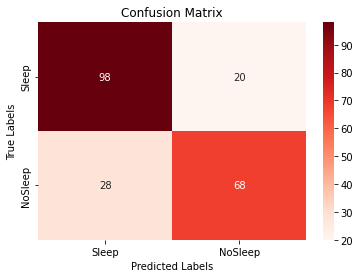

In [139]:
from sklearn.metrics import classification_report, confusion_matrix

cm=confusion_matrix(test_labels, stacking_pred, labels=[1,0])
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Reds', fmt='d')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Sleep','NoSleep'])
ax.yaxis.set_ticklabels(['Sleep','NoSleep'])

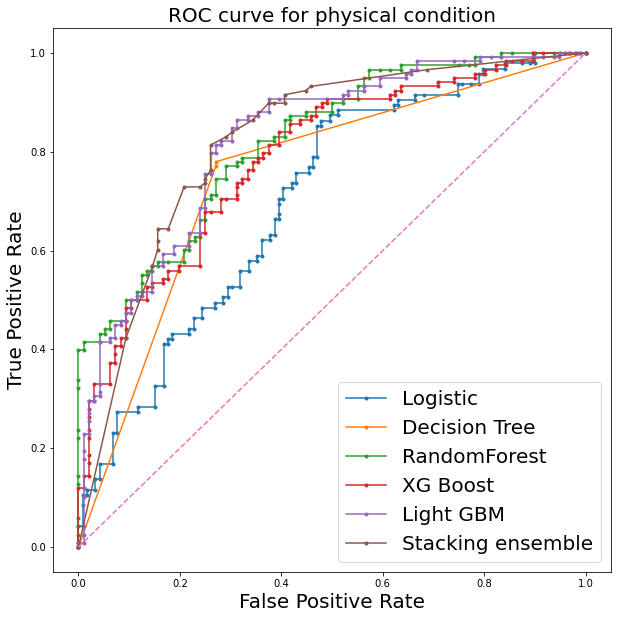

In [140]:
### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(lr_fpr, lr_tpr, marker = '.', label = "Logistic")
plt.plot(dt_fpr, dt_tpr, marker = '.', label = "Decision Tree")
plt.plot(rf_fpr, rf_tpr, marker = '.', label = "RandomForest")
plt.plot(xgb_fpr, xgb_tpr, marker = '.', label = "XG Boost")
plt.plot(lgbm_fpr, lgbm_tpr, marker = '.', label = "Light GBM")
plt.plot(mt_fpr, mt_tpr, marker = '.', label = "Stacking ensemble")
plt.plot(random_fpr, random_tpr, linestyle = '--')



plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve for physical condition", size = 20)
plt.show()

In [141]:
# Initialize the meta model
meta_model1 = LogisticRegression()
meta_model2 = LogisticRegression()
meta_model3 = LogisticRegression()
meta_model4 = LogisticRegression()
meta_model5 = LogisticRegression()

# Generate predictions from base models for training data
logistic_regression_pred_train = lr.predict(train_features)
decision_tree_pred_train = dt.predict(train_features)
random_forest_pred_train = rf.predict(train_features)
xgboost_pred_train = xgb.predict(train_features)
lgbm_pred_train = lgbm_best.predict(train_features)

# Create a meta-training dataset
meta_train_X1 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train))

meta_train_X2 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 lgbm_pred_train))

meta_train_X3 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 
                                 xgboost_pred_train, lgbm_pred_train))

meta_train_X4 = np.column_stack((logistic_regression_pred_train,
                                 
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))

meta_train_X5 = np.column_stack((
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))


# Train the meta model on the meta-training dataset
meta_model1.fit(meta_train_X1, train_labels)
meta_model2.fit(meta_train_X2, train_labels)
meta_model3.fit(meta_train_X3, train_labels)
meta_model4.fit(meta_train_X4, train_labels)
meta_model5.fit(meta_train_X5, train_labels)

# Generate predictions from base models for testing data
logistic_regression_pred_test = lr.predict(test_features)
decision_tree_pred_test = dt.predict(test_features)
random_forest_pred_test = rf.predict(test_features)
xgboost_pred_test = xgb.predict(test_features)
lgbm_pred_test = lgbm_best.predict(test_features)

# Create a meta-testing dataset
meta_test_X1 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test))

meta_test_X2 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                lgbm_pred_test))

meta_test_X3 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                               
                                xgboost_pred_test, lgbm_pred_test))

meta_test_X4 = np.column_stack((logistic_regression_pred_test,
                                
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

meta_test_X5 = np.column_stack((
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

# Make predictions using the stacking ensemble
stacking_pred1 = meta_model1.predict(meta_test_X1)

stacking_pred2 = meta_model2.predict(meta_test_X2)

stacking_pred3 = meta_model3.predict(meta_test_X3)

stacking_pred4 = meta_model4.predict(meta_test_X4)

stacking_pred5 = meta_model5.predict(meta_test_X5)

# Calculate accuracy score of stacking ensemble
accuracy1 = accuracy_score(test_labels, stacking_pred1)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy1 * 100))

accuracy2 = accuracy_score(test_labels, stacking_pred2)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy2 * 100))

accuracy3 = accuracy_score(test_labels, stacking_pred3)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy3 * 100))

accuracy4 = accuracy_score(test_labels, stacking_pred4)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy4 * 100))

accuracy5 = accuracy_score(test_labels, stacking_pred5)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy5 * 100))

y_pred_meta1 = meta_model1.predict_proba(meta_test_X1)[:, 1]
mt_fpr1, mt_tpr1, threshold1 = roc_curve(test_labels, y_pred_meta1)

roc_auc = auc(mt_fpr1, mt_tpr1)
print(roc_auc)

y_pred_meta2 = meta_model2.predict_proba(meta_test_X2)[:, 1]
mt_fpr2, mt_tpr2, threshold1 = roc_curve(test_labels, y_pred_meta2)

roc_auc = auc(mt_fpr2, mt_tpr2)
print(roc_auc)

y_pred_meta3 = meta_model3.predict_proba(meta_test_X3)[:, 1]
mt_fpr3, mt_tpr3, threshold1 = roc_curve(test_labels, y_pred_meta3)

roc_auc = auc(mt_fpr3, mt_tpr3)
print(roc_auc)

y_pred_meta4 = meta_model4.predict_proba(meta_test_X4)[:, 1]
mt_fpr4, mt_tpr4, threshold1 = roc_curve(test_labels, y_pred_meta4)

roc_auc = auc(mt_fpr1, mt_tpr1)
print(roc_auc)

y_pred_meta5 = meta_model5.predict_proba(meta_test_X5)[:, 1]
mt_fpr5, mt_tpr5, threshold1 = roc_curve(test_labels, y_pred_meta5)

roc_auc = auc(mt_fpr5, mt_tpr5)
print(roc_auc)

Accuracy of stacking ensemble: 75.23%
Accuracy of stacking ensemble: 77.10%
Accuracy of stacking ensemble: 76.64%
Accuracy of stacking ensemble: 74.77%
Accuracy of stacking ensemble: 78.04%
0.8157662429378532
0.8260504943502824
0.8269332627118644
0.8157662429378532
0.8164724576271187


In [142]:
# Initialize the meta model
meta_model = LogisticRegression()

# Generate predictions from base models for training data
meta_model1_pred_train = meta_model1.predict(meta_train_X1)
meta_model2_pred_train = meta_model2.predict(meta_train_X2)
meta_model3_pred_train = meta_model3.predict(meta_train_X3)
meta_model4_pred_train = meta_model4.predict(meta_train_X4)
meta_model5_pred_train = meta_model5.predict(meta_train_X5)

# Create a meta-training dataset
meta_train_X = np.column_stack((meta_model1_pred_train,
                                 meta_model2_pred_train,
                                 meta_model3_pred_train,
                                 meta_model4_pred_train, meta_model5_pred_train))

# Train the meta model on the meta-training dataset
meta_model.fit(meta_train_X, train_labels)

# Generate predictions from base models for testing data
meta_model1_pred_test = meta_model1.predict(meta_test_X1)
meta_model2_pred_test = meta_model2.predict(meta_test_X2)
meta_model3_pred_test = meta_model3.predict(meta_test_X3)
meta_model4_pred_test = meta_model4.predict(meta_test_X4)
meta_model5_pred_test = meta_model5.predict(meta_test_X5)

# Create a meta-testing dataset
meta_test_X = np.column_stack((meta_model1_pred_test,
                                meta_model2_pred_test,
                                meta_model3_pred_test,
                                meta_model4_pred_test, meta_model5_pred_test))

# Make predictions using the stacking ensemble
stacking_pred = meta_model.predict(meta_test_X)

# Calculate accuracy score of stacking ensemble
accuracy = accuracy_score(test_labels, stacking_pred)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy * 100))

y_pred_meta = meta_model.predict_proba(meta_test_X)[:, 1]
mt_fpr, mt_tpr, threshold1 = roc_curve(test_labels, y_pred_meta)

roc_auc = auc(mt_fpr, mt_tpr)
print(roc_auc)

Accuracy of stacking ensemble: 78.04%
0.7795286016949153


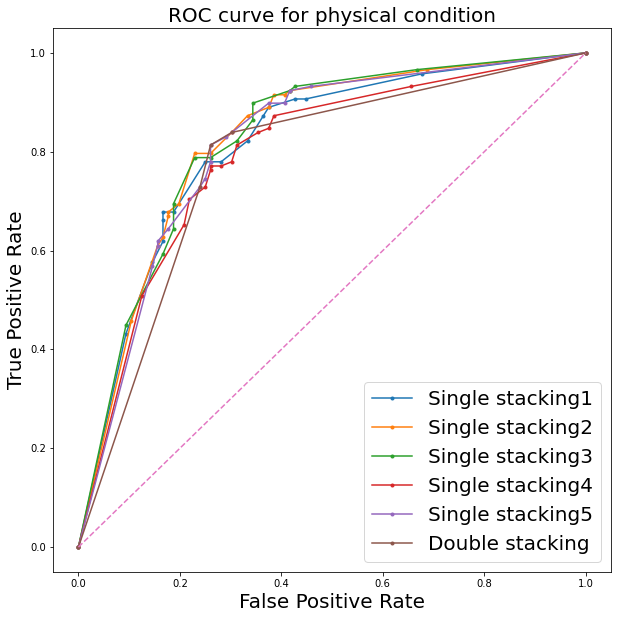

In [143]:
### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(mt_fpr1, mt_tpr1, marker = '.', label = "Single stacking1")
plt.plot(mt_fpr2, mt_tpr2, marker = '.', label = "Single stacking2")
plt.plot(mt_fpr3, mt_tpr3, marker = '.', label = "Single stacking3")
plt.plot(mt_fpr4, mt_tpr4, marker = '.', label = "Single stacking4")
plt.plot(mt_fpr5, mt_tpr5, marker = '.', label = "Single stacking5")
plt.plot(mt_fpr, mt_tpr, marker = '.', label = "Double stacking")
plt.plot(random_fpr, random_tpr, linestyle = '--')



plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve for physical condition", size = 20)
plt.show()

In [57]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [58]:
train_features=pd.DataFrame(train_features, columns=feature.columns)

In [59]:
test_features=pd.DataFrame(test_features, columns=feature.columns)

In [60]:
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [61]:
print(model.score(test_features, test_labels))

0.616822429906542


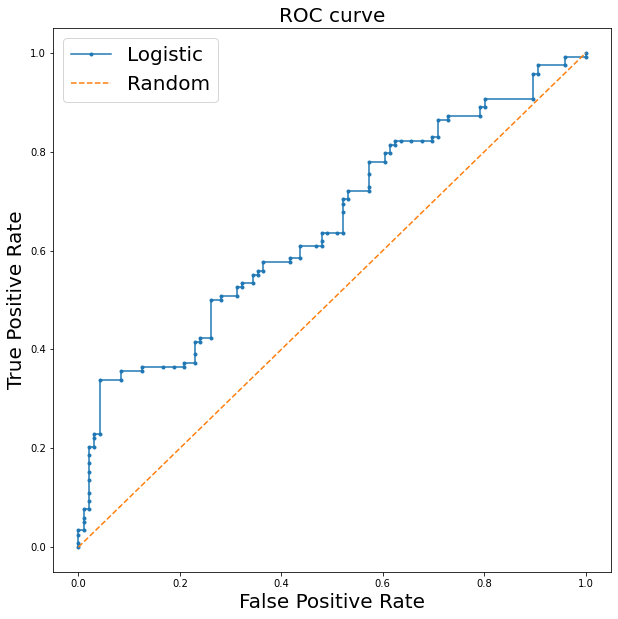



 ROC AUC score :  0.6504237288135593
[[92 26]
 [56 40]]
accuracy score: 0.616822429906542
precision score: 0.6216216216216216
recall score: 0.7796610169491526
f1 score: 0.6917293233082706
              precision    recall  f1-score   support

           0       0.61      0.42      0.49        96
           1       0.62      0.78      0.69       118

    accuracy                           0.62       214
   macro avg       0.61      0.60      0.59       214
weighted avg       0.61      0.62      0.60       214



In [62]:
### roc curve 패키지로 fpr, tpr 뽑기
y_pred=model.predict(test_features)
probs = model.predict_proba(test_features)[:,1]
model_fpr, model_tpr, threshold1 = roc_curve(test_labels, probs)

### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(model_fpr, model_tpr, marker = '.', label = "Logistic")
plt.plot(random_fpr, random_tpr, linestyle = '--', label = "Random")

plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve", size = 20)
plt.show()


### AUC 값 확인하기 (ROC curve 아래 부분 면적)
roc_auc = auc(model_fpr, model_tpr)
print("\n\n ROC AUC score : ", roc_auc)
print(confusion_matrix(test_labels, y_pred, labels=[1,0]))
print('accuracy score:', accuracy_score(test_labels, y_pred))
print('precision score:',precision_score(test_labels, y_pred, pos_label=1))
print('recall score:', recall_score(test_labels, y_pred, pos_label=1))
print('f1 score:', f1_score(test_labels, y_pred, pos_label=1))
print(classification_report(test_labels, y_pred))

In [63]:
#5 amEmotion

In [144]:
sleep=final['amEmotion'].apply(lambda x: 0 if x==1 or x==2 else 1)

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features, test_features, train_labels, test_labels= train_test_split(feature,sleep,stratify=sleep, test_size=0.2, shuffle=True)

In [146]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [668]:
sleep=final['sleep'].apply(lambda x: 0 if x==1 or x==2 else 1)

In [669]:
final['sleep'].value_counts()

4.0    441
3.0    312
2.0    200
5.0     82
1.0     34
Name: sleep, dtype: int64

In [670]:
sleep.value_counts()

1    835
0    234
Name: sleep, dtype: int64

In [671]:
sleep=sleep.reset_index(drop=True)

In [672]:
feature

,walk,exer,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
0,45,0,4.0,4.0,1,1,1,27,-0.013653,3.103176,86.727616,33.021747,0.000000
1,30,0,5.0,4.0,1,1,1,27,0.056283,2.503302,87.789920,34.441982,0.000000
2,20,0,5.0,2.0,1,1,1,27,0.036912,3.373406,85.270147,33.193400,0.000000
3,20,0,3.0,2.0,0,0,1,27,0.009140,1.663482,89.475536,34.086428,0.000000
4,35,0,4.0,4.0,1,1,1,27,-0.004555,0.773490,88.103819,34.190778,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,81,4,3.0,2.0,0,0,1,24,0.000718,0.120715,88.643042,35.732362,0.000000
1065,89,0,3.0,2.0,0,0,1,24,-0.002291,0.206694,78.212777,35.668583,0.000000
1066,140,0,3.0,3.0,1,0,1,24,0.000417,0.693704,84.231193,35.719695,0.000000
1067,17,0,3.0,3.0,1,0,1,24,-0.007869,0.430001,82.935526,35.455277,166.408832


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train_features, test_features, train_labels, test_labels= train_test_split(feature,sleep,stratify=sleep, test_size=0.2, shuffle=True)

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [728]:
train_features=pd.DataFrame(train_features, columns=feature.columns)

In [729]:
test_features=pd.DataFrame(test_features, columns=feature.columns)

In [730]:
train_features.agg(['mean','std']).round(2)

,walk,exer,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
mean,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [149]:
lr = LogisticRegression()
lr.fit(train_features, train_labels)

LogisticRegression()

In [150]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

param_grid = {
    'C': np.logspace(-3, 3, 7),  # Regularization strength
    'penalty': ['l1', 'l2']      # Regularization type
}

# Create a k-fold cross-validation object with k=5
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an instance of GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lr, param_grid, cv=kfold)

# Perform hyperparameter tuning with k-fold cross-validation on the training set
grid_search.fit(train_features, train_labels)

# Print the best hyperparameters found during tuning
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Train the model with the best hyperparameters on the entire training set
lr = grid_search.best_estimator_
lr.fit(test_features, test_labels)

# Evaluate the best model on the testing set
test_accuracy = lr.score(test_features, test_labels)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Best Hyperparameters:
{'C': 0.001, 'penalty': 'l2'}
Testing Accuracy: 0.7850


C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

In [151]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, r2_score, accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score, confusion_matrix, classification_report, roc_auc_score, auc

In [152]:
print(lr.score(test_features, test_labels))

0.7850467289719626


In [153]:
clf = DecisionTreeClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=kfold)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Decision Tree classifier with the best hyperparameters
dt = DecisionTreeClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
dt.fit(train_features, train_labels)

# Make predictions
y_pred = dt.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = dt.predict_proba(test_features)[:,1]
dt_fpr, dt_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 0.8037383177570093


In [154]:
clf = RandomForestClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
rf = RandomForestClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
rf.fit(train_features, train_labels)

# Make predictions
y_pred = rf.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = rf.predict_proba(test_features)[:,1]
rf_fpr, rf_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 0.8598130841121495


In [155]:
import xgboost as xgb

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Create an instance of the XGBoost classifier
xgb_model = xgb.XGBClassifier()

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create an instance of GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10)

# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
xgb = xgb.XGBClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
xgb.fit(train_features, train_labels)

# Make predictions
y_pred = xgb.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

probs = xgb.predict_proba(test_features)[:,1]
xgb_fpr, xgb_tpr, threshold1 = roc_curve(test_labels, probs)

Best Hyperparameters:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.8}
Best Accuracy:  0.8351299589603283
Accuracy: 0.8084112149532711


In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

# Define hyperparameter grid for tuning
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': [31, 63],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'objective': ['binary'],
    'reg_alpha': [0.0, 0.1, 0.2],
    'reg_lambda': [0.0, 0.1, 0.2],
    'n_jobs': [-1],
    'silent': [True]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the LightGBM classifier with the best hyperparameters
lgbm_best = LGBMClassifier(**best_params)
lgbm_best.fit(train_labels, train_labels)

# Predict on the testing set
y_pred = lgbm_best.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [157]:
lgbm_best.fit(train_features, train_labels)

# Predict on the testing set
y_pred = lgbm_best.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

probs = lgbm_best.predict_proba(test_features)[:,1]
lgbm_fpr, lgbm_tpr, threshold1 = roc_curve(test_labels, probs)

Accuracy: 83.64%


C:\Users\pc\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


In [794]:
stacking_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [793]:
probs

array([0.95924906, 0.93564804, 0.25646566, 0.99094986, 0.87128606,
       0.96874236, 0.97702064, 0.99019274, 0.91494623, 0.39012982,
       0.06999261, 0.94314665, 0.82781167, 0.97326681, 0.98016794,
       0.98521892, 0.76296837, 0.9431974 , 0.89879247, 0.52173726,
       0.76942572, 0.34912373, 0.87606128, 0.93696986, 0.63629192,
       0.82136094, 0.83384831, 0.98240215, 0.94628343, 0.62367385,
       0.25152885, 0.94531185, 0.95523077, 0.99430253, 0.58648059,
       0.97360665, 0.76565319, 0.94618097, 0.11068171, 0.88494877,
       0.39196825, 0.9645753 , 0.99427579, 0.7620071 , 0.79813246,
       0.97213665, 0.97362734, 0.06999261, 0.95154111, 0.94743673,
       0.90855003, 0.90769343, 0.39644685, 0.94813763, 0.93166876,
       0.87819196, 0.99046815, 0.93337527, 0.98410621, 0.30738034,
       0.25646566, 0.46356979, 0.83030132, 0.092644  , 0.98604146,
       0.94314665, 0.97318523, 0.95356328, 0.91220138, 0.79896795,
       0.91488423, 0.98670387, 0.92828   , 0.97733059, 0.93067

In [159]:
# Initialize the meta model
meta_model = LogisticRegression()

# Generate predictions from base models for training data
logistic_regression_pred_train = lr.predict(train_features)
decision_tree_pred_train = dt.predict(train_features)
random_forest_pred_train = rf.predict(train_features)
xgboost_pred_train = xgb.predict(train_features)
lgbm_pred_train = lgbm_best.predict(train_features)

# Create a meta-training dataset
meta_train_X = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))

# Train the meta model on the meta-training dataset
meta_model.fit(meta_train_X, train_labels)

# Generate predictions from base models for testing data
logistic_regression_pred_test = lr.predict(test_features)
decision_tree_pred_test = dt.predict(test_features)
random_forest_pred_test = rf.predict(test_features)
xgboost_pred_test = xgb.predict(test_features)
lgbm_pred_test = lgbm_best.predict(test_features)

# Create a meta-testing dataset
meta_test_X = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

# Make predictions using the stacking ensemble
stacking_pred = meta_model.predict(meta_test_X)

# Calculate accuracy score of stacking ensemble
accuracy = accuracy_score(test_labels, stacking_pred)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy * 100))

Accuracy of stacking ensemble: 83.18%


In [160]:
y_pred_meta = meta_model.predict_proba(meta_test_X)[:, 1]

In [161]:
mt_fpr, mt_tpr, threshold1 = roc_curve(test_labels, y_pred_meta)

In [162]:
roc_auc = auc(mt_fpr, mt_tpr)
print(roc_auc)

0.7426242236024844


[Text(0, 0.5, 'Sleep'), Text(0, 1.5, 'NoSleep')]

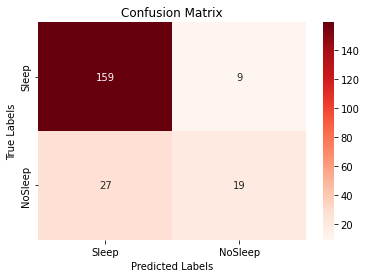

In [163]:
from sklearn.metrics import classification_report, confusion_matrix

cm=confusion_matrix(test_labels, stacking_pred, labels=[1,0])
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Reds', fmt='d')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Sleep','NoSleep'])
ax.yaxis.set_ticklabels(['Sleep','NoSleep'])

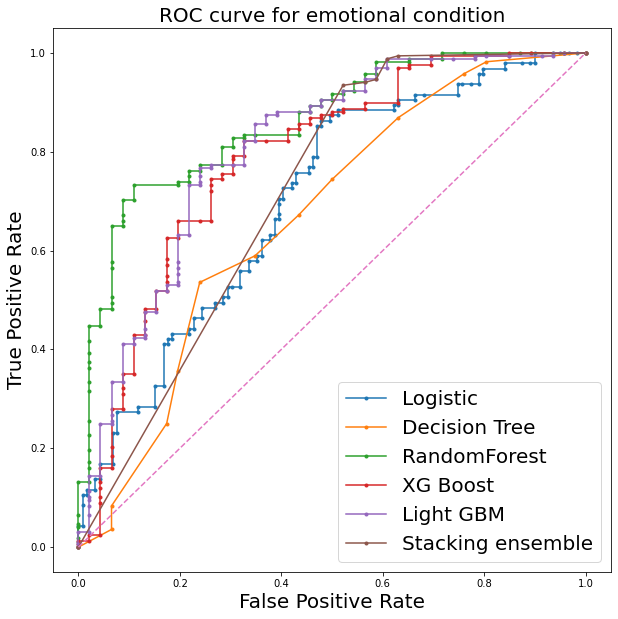

In [170]:
### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(lr_fpr, lr_tpr, marker = '.', label = "Logistic")
plt.plot(dt_fpr, dt_tpr, marker = '.', label = "Decision Tree")
plt.plot(rf_fpr, rf_tpr, marker = '.', label = "RandomForest")
plt.plot(xgb_fpr, xgb_tpr, marker = '.', label = "XG Boost")
plt.plot(lgbm_fpr, lgbm_tpr, marker = '.', label = "Light GBM")
plt.plot(mt_fpr, mt_tpr, marker = '.', label = "Stacking ensemble")
plt.plot(random_fpr, random_tpr, linestyle = '--')



plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve for emotional condition", size = 20)
plt.show()

In [810]:
logistic_regression_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [171]:
# Initialize the meta model
meta_model1 = LogisticRegression()
meta_model2 = LogisticRegression()
meta_model3 = LogisticRegression()
meta_model4 = LogisticRegression()
meta_model5 = LogisticRegression()

# Generate predictions from base models for training data
logistic_regression_pred_train = lr.predict(train_features)
decision_tree_pred_train = dt.predict(train_features)
random_forest_pred_train = rf.predict(train_features)
xgboost_pred_train = xgb.predict(train_features)
lgbm_pred_train = lgbm_best.predict(train_features)

# Create a meta-training dataset
meta_train_X1 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train))

meta_train_X2 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 lgbm_pred_train))

meta_train_X3 = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 
                                 xgboost_pred_train, lgbm_pred_train))

meta_train_X4 = np.column_stack((logistic_regression_pred_train,
                                 
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))

meta_train_X5 = np.column_stack((
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train, lgbm_pred_train))


# Train the meta model on the meta-training dataset
meta_model1.fit(meta_train_X1, train_labels)
meta_model2.fit(meta_train_X2, train_labels)
meta_model3.fit(meta_train_X3, train_labels)
meta_model4.fit(meta_train_X4, train_labels)
meta_model5.fit(meta_train_X5, train_labels)

# Generate predictions from base models for testing data
logistic_regression_pred_test = lr.predict(test_features)
decision_tree_pred_test = dt.predict(test_features)
random_forest_pred_test = rf.predict(test_features)
xgboost_pred_test = xgb.predict(test_features)
lgbm_pred_test = lgbm_best.predict(test_features)

# Create a meta-testing dataset
meta_test_X1 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test))

meta_test_X2 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                lgbm_pred_test))

meta_test_X3 = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                               
                                xgboost_pred_test, lgbm_pred_test))

meta_test_X4 = np.column_stack((logistic_regression_pred_test,
                                
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

meta_test_X5 = np.column_stack((
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test, lgbm_pred_test))

# Make predictions using the stacking ensemble
stacking_pred1 = meta_model1.predict(meta_test_X1)

stacking_pred2 = meta_model2.predict(meta_test_X2)

stacking_pred3 = meta_model3.predict(meta_test_X3)

stacking_pred4 = meta_model4.predict(meta_test_X4)

stacking_pred5 = meta_model5.predict(meta_test_X5)

# Calculate accuracy score of stacking ensemble
accuracy1 = accuracy_score(test_labels, stacking_pred1)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy1 * 100))

accuracy2 = accuracy_score(test_labels, stacking_pred2)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy2 * 100))

accuracy3 = accuracy_score(test_labels, stacking_pred3)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy3 * 100))

accuracy4 = accuracy_score(test_labels, stacking_pred4)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy4 * 100))

accuracy5 = accuracy_score(test_labels, stacking_pred5)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy5 * 100))

y_pred_meta1 = meta_model1.predict_proba(meta_test_X1)[:, 1]
mt_fpr1, mt_tpr1, threshold1 = roc_curve(test_labels, y_pred_meta1)

roc_auc = auc(mt_fpr1, mt_tpr1)
print(roc_auc)

y_pred_meta2 = meta_model2.predict_proba(meta_test_X2)[:, 1]
mt_fpr2, mt_tpr2, threshold1 = roc_curve(test_labels, y_pred_meta2)

roc_auc = auc(mt_fpr2, mt_tpr2)
print(roc_auc)

y_pred_meta3 = meta_model3.predict_proba(meta_test_X3)[:, 1]
mt_fpr3, mt_tpr3, threshold1 = roc_curve(test_labels, y_pred_meta3)

roc_auc = auc(mt_fpr3, mt_tpr3)
print(roc_auc)

y_pred_meta4 = meta_model4.predict_proba(meta_test_X4)[:, 1]
mt_fpr4, mt_tpr4, threshold1 = roc_curve(test_labels, y_pred_meta4)

roc_auc = auc(mt_fpr1, mt_tpr1)
print(roc_auc)

y_pred_meta5 = meta_model5.predict_proba(meta_test_X5)[:, 1]
mt_fpr5, mt_tpr5, threshold1 = roc_curve(test_labels, y_pred_meta5)

roc_auc = auc(mt_fpr5, mt_tpr5)
print(roc_auc)

Accuracy of stacking ensemble: 85.98%
Accuracy of stacking ensemble: 85.98%
Accuracy of stacking ensemble: 83.64%
Accuracy of stacking ensemble: 83.18%
Accuracy of stacking ensemble: 83.18%
0.7217261904761905
0.7507763975155279
0.7264492753623188
0.7217261904761905
0.7426242236024844


In [172]:
# Initialize the meta model
meta_model = LogisticRegression()

# Generate predictions from base models for training data
meta_model1_pred_train = meta_model1.predict(meta_train_X1)
meta_model2_pred_train = meta_model2.predict(meta_train_X2)
meta_model3_pred_train = meta_model3.predict(meta_train_X3)
meta_model4_pred_train = meta_model4.predict(meta_train_X4)
meta_model5_pred_train = meta_model5.predict(meta_train_X5)

# Create a meta-training dataset
meta_train_X = np.column_stack((meta_model1_pred_train,
                                 meta_model2_pred_train,
                                 meta_model3_pred_train,
                                 meta_model4_pred_train, meta_model5_pred_train))

# Train the meta model on the meta-training dataset
meta_model.fit(meta_train_X, train_labels)

# Generate predictions from base models for testing data
meta_model1_pred_test = meta_model1.predict(meta_test_X1)
meta_model2_pred_test = meta_model2.predict(meta_test_X2)
meta_model3_pred_test = meta_model3.predict(meta_test_X3)
meta_model4_pred_test = meta_model4.predict(meta_test_X4)
meta_model5_pred_test = meta_model5.predict(meta_test_X5)

# Create a meta-testing dataset
meta_test_X = np.column_stack((meta_model1_pred_test,
                                meta_model2_pred_test,
                                meta_model3_pred_test,
                                meta_model4_pred_test, meta_model5_pred_test))

# Make predictions using the stacking ensemble
stacking_pred = meta_model.predict(meta_test_X)

# Calculate accuracy score of stacking ensemble
accuracy = accuracy_score(test_labels, stacking_pred)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy * 100))

y_pred_meta = meta_model.predict_proba(meta_test_X)[:, 1]
mt_fpr, mt_tpr, threshold1 = roc_curve(test_labels, y_pred_meta)

roc_auc = auc(mt_fpr, mt_tpr)
print(roc_auc)

Accuracy of stacking ensemble: 83.18%
0.7160973084886129


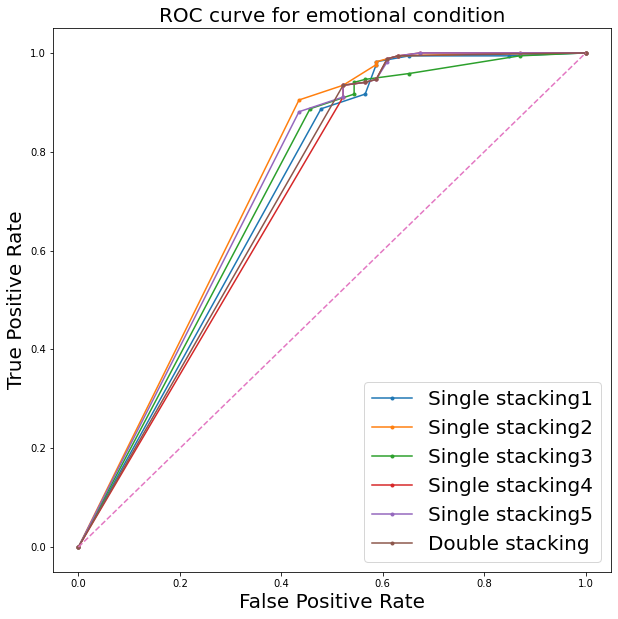

In [173]:
### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(mt_fpr1, mt_tpr1, marker = '.', label = "Single stacking1")
plt.plot(mt_fpr2, mt_tpr2, marker = '.', label = "Single stacking2")
plt.plot(mt_fpr3, mt_tpr3, marker = '.', label = "Single stacking3")
plt.plot(mt_fpr4, mt_tpr4, marker = '.', label = "Single stacking4")
plt.plot(mt_fpr5, mt_tpr5, marker = '.', label = "Single stacking5")
plt.plot(mt_fpr, mt_tpr, marker = '.', label = "Double stacking")
plt.plot(random_fpr, random_tpr, linestyle = '--')



plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve for emotional condition", size = 20)
plt.show()

In [67]:
train_features=pd.DataFrame(train_features, columns=feature.columns)

In [68]:
test_features=pd.DataFrame(test_features, columns=feature.columns)

In [69]:
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [70]:
print(model.score(test_features, test_labels))

0.7897196261682243


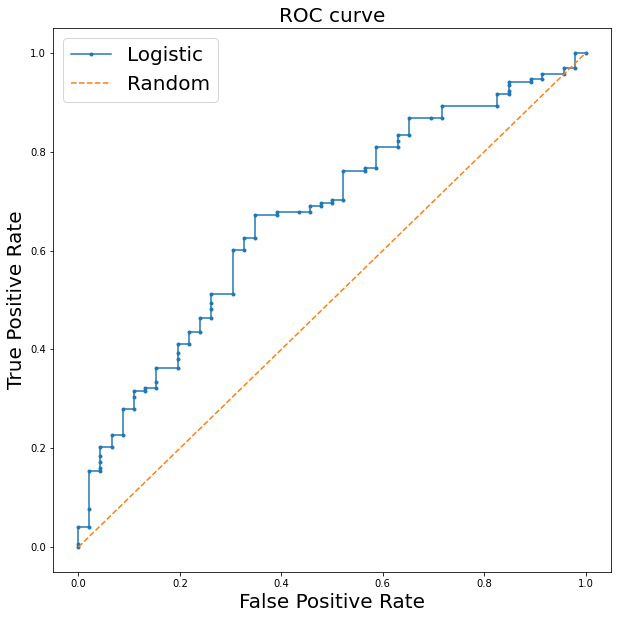



 ROC AUC score :  0.6683488612836439
[[168   0]
 [ 45   1]]
accuracy score: 0.7897196261682243
precision score: 0.7887323943661971
recall score: 1.0
f1 score: 0.8818897637795275
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        46
           1       0.79      1.00      0.88       168

    accuracy                           0.79       214
   macro avg       0.89      0.51      0.46       214
weighted avg       0.83      0.79      0.70       214



In [71]:
### roc curve 패키지로 fpr, tpr 뽑기
y_pred=model.predict(test_features)
probs = model.predict_proba(test_features)[:,1]
model_fpr, model_tpr, threshold1 = roc_curve(test_labels, probs)

### 랜덤하게 했을때는 fpr, tpr 모두 0.5, 0.5로 나온다. 
random_fpr, random_tpr, threshold2 = roc_curve(test_labels, [0 for i in range(len(test_features))]) 

plt.figure(figsize = (10,10))
plt.plot(model_fpr, model_tpr, marker = '.', label = "Logistic")
plt.plot(random_fpr, random_tpr, linestyle = '--', label = "Random")

plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve", size = 20)
plt.show()


### AUC 값 확인하기 (ROC curve 아래 부분 면적)
roc_auc = auc(model_fpr, model_tpr)
print("\n\n ROC AUC score : ", roc_auc)
print(confusion_matrix(test_labels, y_pred, labels=[1,0]))
print('accuracy score:', accuracy_score(test_labels, y_pred))
print('precision score:',precision_score(test_labels, y_pred, pos_label=1))
print('recall score:', recall_score(test_labels, y_pred, pos_label=1))
print('f1 score:', f1_score(test_labels, y_pred, pos_label=1))
print(classification_report(test_labels, y_pred))

In [777]:
#Randomforest

In [116]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [117]:
sleep=final['sleep'].apply(lambda x: 0 if x==1 or x==2 else 1)

In [118]:
final['sleep'].value_counts()

4.0    441
3.0    312
2.0    200
5.0     82
1.0     34
Name: sleep, dtype: int64

In [119]:
sleep=sleep.reset_index(drop=True)

In [120]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels= train_test_split(feature,sleep,stratify=sleep, test_size=0.2, shuffle=True)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [122]:
train_features=pd.DataFrame(train_features, columns=feature.columns)

In [123]:
test_features=pd.DataFrame(test_features, columns=feature.columns)

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [872]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                      ('lr_classifier',LogisticRegression())])

In [873]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                      ('dt_classifier',DecisionTreeClassifier())])

In [874]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('rf_classifier',RandomForestClassifier())])

In [875]:
pipeline_xgboost=Pipeline([('scalar4',StandardScaler()),
                     ('xgboost_classifier',XGBClassifier())])

In [876]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_xgboost]

In [877]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [878]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision tree', 2: 'RandomForest', 3:'XG Boost'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(train_features, train_labels)

In [879]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(test_features,test_labels)))

Logistic Regression Test Accuracy: 0.6495327102803738
Decision tree Test Accuracy: 0.7383177570093458
RandomForest Test Accuracy: 0.8037383177570093
XG Boost Test Accuracy: 0.7897196261682243


In [880]:
for i,model in enumerate(pipelines):
    if model.score(test_features,test_labels)>best_accuracy:
        best_accuracy=model.score(test_features,test_labels)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


In [156]:
clf = RandomForestClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
best_clf = RandomForestClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
best_clf.fit(train_features, train_labels)

# Make predictions
y_pred = best_clf.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8644859813084113


In [885]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
                       max_depth=2, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

rfc.fit(train_features, train_labels)

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=5,
                       min_samples_leaf=10, n_jobs=-1, random_state=1)

In [886]:
y_pred = rfc.predict(test_features)

In [887]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 1 decision-trees : {0:0.4f}'. format(accuracy_score(test_labels, y_pred)))

Model accuracy score with 1 decision-trees : 0.6682


In [126]:
rfc_100 = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
# fit the model to the training set
rfc_100.fit(train_features, train_labels)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       min_samples_leaf=10, n_jobs=-1, random_state=1)

In [127]:
# Predict on the test set results
y_pred_100 = rfc_100.predict(test_features)
print(classification_report(test_labels, y_pred_100))

              precision    recall  f1-score   support

           0       0.41      0.66      0.51        47
           1       0.88      0.74      0.80       167

    accuracy                           0.72       214
   macro avg       0.65      0.70      0.66       214
weighted avg       0.78      0.72      0.74       214



In [135]:
y_pred = rfc_100.predict(test_features)

In [136]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 1 decision-trees : {0:0.4f}'. format(accuracy_score(test_labels, y_pred)))

Model accuracy score with 1 decision-trees : 0.7196


[Text(0, 0.5, 'Sleep'), Text(0, 1.5, 'NoSleep')]

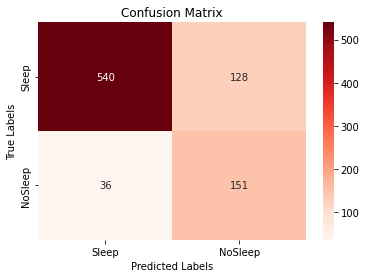

In [131]:
from sklearn.metrics import classification_report, confusion_matrix

cm=confusion_matrix(train_labels, y_pred, labels=[1,0])
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Reds', fmt='d')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Sleep','NoSleep'])
ax.yaxis.set_ticklabels(['Sleep','NoSleep'])

In [137]:
from xgboost import XGBClassifier

In [150]:
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(train_features, train_labels)
y_pred = xgb.predict(test_features)
y_pred_proba= xgb.predict_proba(test_features)[:,1]

In [151]:
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8317757009345794


In [152]:
# Calculate AUROC
auroc = roc_auc_score(test_labels, y_pred)
print("AUROC:", auroc)

# Calculate F1-score
f1 = f1_score(test_labels, y_pred)
print("F1-score:", f1)

AUROC: 0.7316855650401326
F1-score: 0.8941176470588235


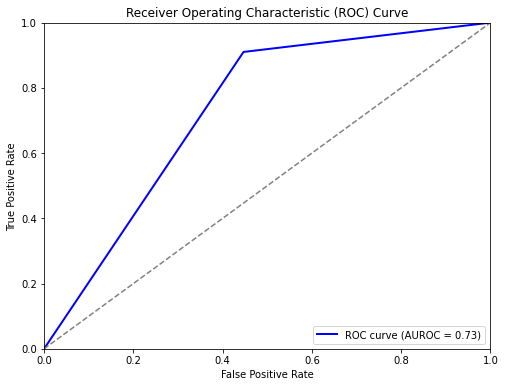



 ROC AUC score :  0.7316855650401326
[[152  15]
 [ 21  26]]
accuracy score: 0.8317757009345794
precision score: 0.8786127167630058
recall score: 0.9101796407185628
f1 score: 0.8941176470588235
              precision    recall  f1-score   support

           0       0.63      0.55      0.59        47
           1       0.88      0.91      0.89       167

    accuracy                           0.83       214
   macro avg       0.76      0.73      0.74       214
weighted avg       0.82      0.83      0.83       214



In [153]:
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUROC = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### AUC 값 확인하기 (ROC curve 아래 부분 면적)
auroc = roc_auc_score(test_labels, y_pred)
print("\n\n ROC AUC score : ", auroc)
print(confusion_matrix(test_labels, y_pred, labels=[1,0]))
print('accuracy score:', accuracy_score(test_labels, y_pred))
print('precision score:',precision_score(test_labels, y_pred, pos_label=1))
print('recall score:', recall_score(test_labels, y_pred, pos_label=1))
print('f1 score:', f1_score(test_labels, y_pred, pos_label=1))
print(classification_report(test_labels, y_pred))

In [ ]:
# Decision tree

In [155]:
clf = DecisionTreeClassifier()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Decision Tree classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(**best_params)

# Train the classifier on the training data with the best hyperparameters
best_clf.fit(train_features, train_labels)

# Make predictions
y_pred = best_clf.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7523364485981309


In [158]:
# Initialize the base models
logistic_regression = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

# Initialize the meta model
meta_model = LogisticRegression()

# Train the base models
logistic_regression.fit(train_features, train_labels)
decision_tree.fit(train_features, train_labels)
random_forest.fit(train_features, train_labels)
xgboost.fit(train_features, train_labels)

# Generate predictions from base models for training data
logistic_regression_pred_train = logistic_regression.predict(train_features)
decision_tree_pred_train = decision_tree.predict(train_features)
random_forest_pred_train = random_forest.predict(train_features)
xgboost_pred_train = xgboost.predict(train_features)

# Create a meta-training dataset
meta_train_X = np.column_stack((logistic_regression_pred_train,
                                 decision_tree_pred_train,
                                 random_forest_pred_train,
                                 xgboost_pred_train))

# Train the meta model on the meta-training dataset
meta_model.fit(meta_train_X, train_labels)

# Generate predictions from base models for testing data
logistic_regression_pred_test = logistic_regression.predict(test_features)
decision_tree_pred_test = decision_tree.predict(test_features)
random_forest_pred_test = random_forest.predict(test_features)
xgboost_pred_test = xgboost.predict(test_features)

# Create a meta-testing dataset
meta_test_X = np.column_stack((logistic_regression_pred_test,
                                decision_tree_pred_test,
                                random_forest_pred_test,
                                xgboost_pred_test))

# Make predictions using the stacking ensemble
stacking_pred = meta_model.predict(meta_test_X)

# Calculate accuracy score of stacking ensemble
accuracy = accuracy_score(test_labels, stacking_pred)
print("Accuracy of stacking ensemble: {:.2f}%".format(accuracy * 100))

Accuracy of stacking ensemble: 82.71%


In [159]:
accuracy

0.8271028037383178

In [160]:
feature

,walk,exer,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
0,45,0,1,1,1,1,1,27,-0.013653,3.103176,86.727616,33.021747,0.000000
1,30,0,1,1,1,1,1,27,0.056283,2.503302,87.789920,34.441982,0.000000
2,20,0,1,0,1,1,1,27,0.036912,3.373406,85.270147,33.193400,0.000000
3,20,0,1,0,0,0,1,27,0.009140,1.663482,89.475536,34.086428,0.000000
4,35,0,1,1,1,1,1,27,-0.004555,0.773490,88.103819,34.190778,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,81,4,1,0,0,0,1,24,0.000718,0.120715,88.643042,35.732362,0.000000
1065,89,0,1,0,0,0,1,24,-0.002291,0.206694,78.212777,35.668583,0.000000
1066,140,0,1,1,1,0,1,24,0.000417,0.693704,84.231193,35.719695,0.000000
1067,17,0,1,1,1,0,1,24,-0.007869,0.430001,82.935526,35.455277,166.408832


In [181]:
final['Unnamed: 0'].value_counts()

306    3
71     3
238    3
345    3
344    3
      ..
4      1
247    1
252    1
522    1
335    1
Name: Unnamed: 0, Length: 570, dtype: int64

In [615]:
feature=final[['userId','walk', 'exer', 'pmEmotion', 'pmStress', 'caffeine', 'alcohol', 'gender', 'age',\
                       'e4Bvp','e4Eda','e4Hr','e4Temp','gps_activity_distance']]

KeyError: "['userId'] not in index"

In [616]:
feature

,walk,exer,pmEmotion,pmStress,caffeine,alcohol,gender,age,e4Bvp,e4Eda,e4Hr,e4Temp,gps_activity_distance
0,45,0,1,1,1,1,1,27,-0.013653,3.103176,86.727616,33.021747,0.000000
1,30,0,1,1,1,1,1,27,0.056283,2.503302,87.789920,34.441982,0.000000
2,20,0,1,0,1,1,1,27,0.036912,3.373406,85.270147,33.193400,0.000000
3,20,0,1,0,0,0,1,27,0.009140,1.663482,89.475536,34.086428,0.000000
4,35,0,1,1,1,1,1,27,-0.004555,0.773490,88.103819,34.190778,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,81,4,1,0,0,0,1,24,0.000718,0.120715,88.643042,35.732362,0.000000
1065,89,0,1,0,0,0,1,24,-0.002291,0.206694,78.212777,35.668583,0.000000
1066,140,0,1,1,1,0,1,24,0.000417,0.693704,84.231193,35.719695,0.000000
1067,17,0,1,1,1,0,1,24,-0.007869,0.430001,82.935526,35.455277,166.408832


#lstm

In [523]:
sleep=pd.read_csv('sleep.csv')
walk=pd.read_csv('walk.csv')
exer=pd.read_csv('exer.csv')
sleepProblem=pd.read_csv('sleepProblem.csv')
dream=pd.read_csv('dream.csv')
amCondition=pd.read_csv('amCondition.csv')
amEmotion=pd.read_csv('amEmotion.csv')
pmEmotion=pd.read_csv('pmEmotion.csv')
pmStress=pd.read_csv('pmStress.csv')
caffeine=pd.read_csv('caffeine.csv')
alcohol=pd.read_csv('alcohol.csv')
e4Bvp=pd.read_csv('e4Bvp.csv')
e4Eda=pd.read_csv('e4Eda.csv')
e4Hr=pd.read_csv('e4Hr.csv')
e4Temp=pd.read_csv('e4Temp.csv')
gps_activity_distance=pd.read_csv('gps_activity_distance.csv')

In [527]:
for i in range(len(sleep)):
    for j in range(len(sleep.iloc[i,:])):
        if sleep.iloc[i,j]==1 or sleep.iloc[i,j]==2:
            sleep.iloc[i,j]=0
        else:
            sleep.iloc[i,j]=1

In [550]:
sleep1=sleep['sleep_14'].to_numpy()
sleep1=torch.Tensor(sleep1)
sleep1=torch.unsqueeze(sleep1,1)

In [482]:
scaler=scaler.fit(walk)
walk1=scaler.transform(walk)
walk1=torch.Tensor(walk1)

In [483]:
scaler=scaler.fit(exer)
exer1=scaler.transform(exer)
exer1=torch.Tensor(exer1)

In [532]:
sleepProblem=sleepProblem.to_numpy()
sleepProblem1=torch.Tensor(sleepProblem1)

In [485]:
dream1=dream.to_numpy()
dream1=torch.Tensor(dream1)

In [533]:
amCondition1=amCondition.to_numpy()
amCondition1=torch.Tensor(amCondition1)

In [534]:
amEmotion1=amEmotion.to_numpy()
amEmotion1=torch.Tensor(amEmotion1)

In [488]:
scaler=scaler.fit(pmEmotion)
pmEmotion1=scaler.transform(pmEmotion)
pmEmotion1=torch.Tensor(pmEmotion1)

In [489]:
scaler=scaler.fit(pmStress)
pmStress1=scaler.transform(pmStress)
pmStress1=torch.Tensor(pmStress1)

In [490]:
scaler=scaler.fit(caffeine)
caffeine1=scaler.transform(caffeine)
caffeine1=torch.Tensor(caffeine1)

In [491]:
scaler=scaler.fit(alcohol)
alcohol1=scaler.transform(alcohol)
alcohol1=torch.Tensor(alcohol1)

In [492]:
scaler=scaler.fit(e4Bvp)
e4Bvp1=scaler.transform(e4Bvp)
e4Bvp1=torch.Tensor(e4Bvp1)

In [493]:
scaler=scaler.fit(e4Eda)
e4Eda1=scaler.transform(e4Eda)
e4Eda1=torch.Tensor(e4Eda1)

In [494]:
scaler=scaler.fit(e4Hr)
e4Hr1=scaler.transform(e4Hr)
e4Hr1=torch.Tensor(e4Hr1)

In [495]:
scaler=scaler.fit(e4Temp)
e4Temp1=scaler.transform(e4Temp)
e4Temp1=torch.Tensor(e4Temp1)

In [496]:
scaler=scaler.fit(gps_activity_distance)
gps_activity_distance1=scaler.transform(gps_activity_distance)
gps_activity_distance1=torch.Tensor(gps_activity_distance1)

In [ ]:
df=torch.stack([sleep1, walk1,exer1,sleepProblem1,dream1,amCondition1,amEmotion1,pmEmotion1,pmStress1,caffeine1,alcohol1,e4Bvp1,e4Eda1,e4Hr1,e4Temp1,gps_activity_distance1],dim=2)

In [500]:
df=torch.stack([walk1,exer1,pmEmotion1,pmStress1,caffeine1,alcohol1,e4Bvp1,e4Eda1,e4Hr1,e4Temp1,gps_activity_distance1],dim=2)

In [501]:
df.shape

torch.Size([51, 14, 11])

In [553]:
sleep1.shape

torch.Size([51, 1])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 27 28 29 30 31 32 33 34 36 37 38 40 41 42 43 45]
[25 26 35 39 44]
[ 0  1  2  5  6  7  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45]
[ 3  4  8 12 41]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 18 20 21 22 23 25 26 27
 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45]
[ 6 17 19 24 32]
[ 0  1  2  3  4  5  6  7  8 10 11 12 14 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45]
[ 9 13 15 16 43]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28 29 32 33 34 35 36 38 39 40 41 42 43 44 45]
[ 0 27 30 31 37]
[ 0  2  3  4  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45]
[ 1  5 11 29 33]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 27 28 29 30 31 32 33 35 36 37 38 39 41 42 43 44 45]
[ 2 21 34 40]

In [563]:
import numpy as np
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Specify the number of folds (k) for cross-validation
k = 10  # replace with the desired number of folds

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # replace 42 with any random seed of your choice

# Define your LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        x = self.fc(h_n.squeeze(0))
        return x

input_size = 11  # replace with the number of input features
hidden_size = 4  # replace with the desired number of hidden units
output_size = 1  # replace with the number of output classes

model = LSTMModel(input_size, hidden_size, output_size)

# Define your loss function and optimizer
criterion=nn.BCEWithLogitsLoss()  # assuming multi-class classification, replace with appropriate loss function for your problem
optimizer = optim.Adam(model.parameters(), lr=0.001)  # replace with appropriate optimizer and learning rate for your problem

# Perform k-fold cross-validation
for fold_idx, (train_index, test_index) in enumerate(kf.split(df)):
    print(f"Fold: {fold_idx + 1}")
    
    # Split the data into train and test sets
    X_train, X_test = df[train_index], df[test_index]
    y_train, y_test = sleep1[train_index], sleep1[test_index]  # assuming you have corresponding labels for your data
       
    # Train the model on the training data
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    print(outputs.shape)
    loss = criterion(outputs, y_train)
    print(loss.shape)
    loss.backward()
    optimizer.step()
    
    # Evaluate the model on the test data
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, y_pred = torch.max(outputs, dim=1)
        accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())  # assuming y_test and y_pred are torch tensors, convert them to numpy arrays
        print(f"Accuracy: {accuracy}")

Fold: 1
torch.Size([45, 1])
torch.Size([])
Accuracy: 0.16666666666666666
Fold: 2
torch.Size([46, 1])
torch.Size([])
Accuracy: 0.6
Fold: 3
torch.Size([46, 1])
torch.Size([])
Accuracy: 0.2
Fold: 4
torch.Size([46, 1])
torch.Size([])
Accuracy: 0.2
Fold: 5
torch.Size([46, 1])
torch.Size([])
Accuracy: 0.0
Fold: 6
torch.Size([46, 1])
torch.Size([])
Accuracy: 0.0
Fold: 7
torch.Size([46, 1])
torch.Size([])
Accuracy: 0.2
Fold: 8
torch.Size([46, 1])
torch.Size([])
Accuracy: 0.0
Fold: 9
torch.Size([46, 1])
torch.Size([])
Accuracy: 0.2
Fold: 10
torch.Size([46, 1])
torch.Size([])
Accuracy: 0.2


In [609]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df,sleep1,stratify=sleep1, test_size=0.2, shuffle=True)

In [610]:
df.shape

torch.Size([51, 14, 11])

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 31.21it/s]

Fold: 1


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.93it/s]


epoch: 50 learning rate: 0.0001 batch size 4 hidden layer 4 0.3483870967741936 0.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<Figure size 432x288 with 0 Axes>

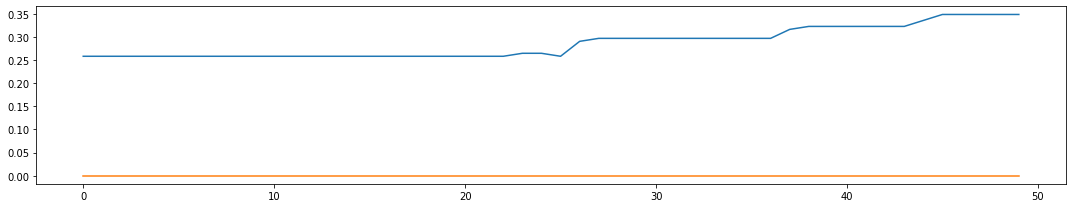

<Figure size 432x288 with 0 Axes>

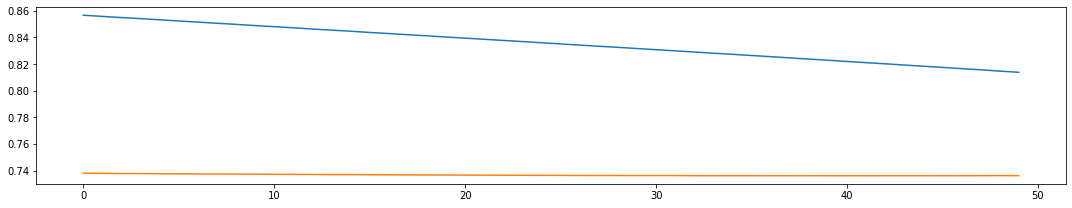

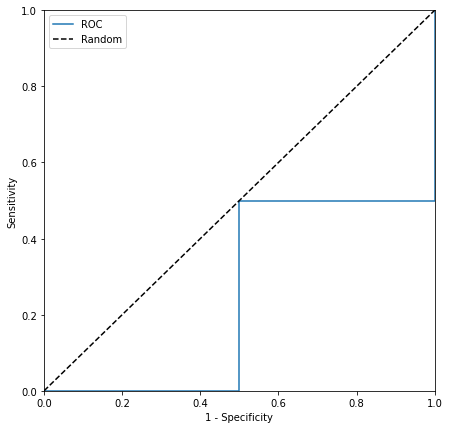

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 34.42it/s]

auc_value: 0.25
Fold: 2


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.74it/s]

epoch: 50 learning rate: 0.0001 batch size 4 hidden layer 4 0.6388888888888888 0.6666666666666666 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23]


<Figure size 432x288 with 0 Axes>

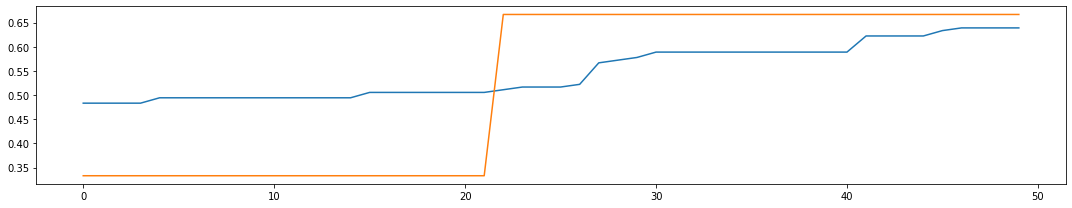

<Figure size 432x288 with 0 Axes>

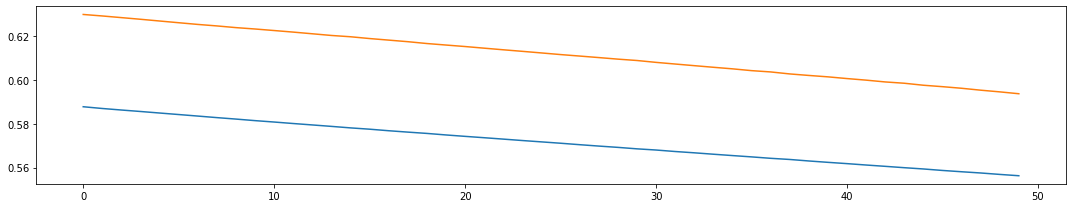

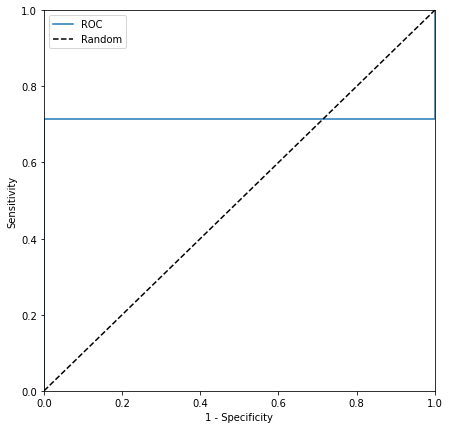

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

auc_value: 0.7142857142857143
Fold: 3


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [613]:
for h in [50, 100]:
    for k in [0.0001, 0.001]:
        for j in [4,8,16]:
            for l in [4,8,16]:
                
                input_dim=11
                hidden_dim=j
            
                output_dim=1
                num_layers=1
                batch_size=l
                                
                lr=k

                n_epoch=h

                # 모델 구조 참고 : https://youtu.be/javWSq-5xzw?list=PLSAJwo7mw8jn8iaXwT4MqLbZnS-LJwnBd&t=3146
                class LSTM(torch.nn.Module):
                    def __init__(self,input_dim,hidden_dim,output_dim,num_layers,batch_size):
                        super(LSTM,self).__init__()
                        
                        self.lstm=torch.nn.LSTM(input_size=input_dim,hidden_size=hidden_dim,num_layers=num_layers,batch_first=True)
                        self.input_dim=input_dim
                        self.hidden_dim=hidden_dim
                        
                        self.output_dim=output_dim
                        self.num_layers=num_layers

                        self.batch_size=batch_size
        
                        self.hidden=hidden_dim
                        self.regressor=self.make_regressor()

                        self.sigmoid=nn.Sigmoid()

                        # torch.nn.init.xavier_uniform(self.fc_hidden1.weight)
                        # torch.nn.init.xavier_uniform(self.classifier.weight)

                        # self.fc_hidden1 레이어의 파라미터를 초기화
                        # torch.nn.init.kaiming_uniform_(self.fc_hidden1.weight)
                        # self.classifier 레이어의 파라미터를 초기화
                        # torch.nn.init.kaiming_uniform_(self.classifier.weight)


                    def make_regressor(self):
                        # LSTM 이후 classifier 부분
                        # https://gaussian37.github.io/dl-concept-order_of_regularization_term/

                        layers=[]
                        layers.append(nn.Linear(self.hidden_dim,1))
                        classifier_part=nn.Sequential(*layers)
                        return classifier_part

                    def forward(self,x_tv,mode=None,batch_size_param=None):
                        h0 = torch.zeros(self.num_layers, x_tv.size(0), self.hidden_dim)
                        c0 = torch.zeros(self.num_layers, x_tv.size(0), self.hidden_dim)
                        lstm_out,self.hidden=self.lstm(x_tv,(h0,c0))
                        # print('lstm_out',lstm_out.shape)
                        # print('lstm_out[:,-1,:]',lstm_out[:,-1,:].shape)
                        # lstm_out torch.Size([500, 5, 12])
                        # lstm_out[:,-1,:] torch.Size([500, 12])
        
                        lstm_vector_from_last_lstm_cell=lstm_out[:,-1,:]
                        # print('lstm_vector_from_last_lstm_cell',lstm_vector_from_last_lstm_cell.shape)
                        # lstm_vector_from_last_lstm_cell torch.Size([500, 12])

                        y_pred=self.regressor(lstm_vector_from_last_lstm_cell)
                            # print('y_pred',y_pred.shape)
                        # y_pred torch.Size([500, 1])
                        return y_pred
                
                for fold_idx, (train_index, test_index) in enumerate(kf.split(X_train)):
                    print(f"Fold: {fold_idx + 1}")
                    X_train1, X_val1 = X_train[train_index], X_train[test_index]
                    y_train1, y_val1 = y_train[train_index], y_train[test_index]  # assuming you have corresponding labels for your data
                    
                    LSTM_Diabetes_dataset=TensorDataset(X_train1,y_train1)
                    LSTM_Diabetes_dataloader=DataLoader(LSTM_Diabetes_dataset,batch_size=batch_size,shuffle=True,num_workers=0,drop_last=True)

                    LSTM_Diabetes_dataset_val=TensorDataset(X_val1,y_val1)
                    LSTM_Diabetes_dataloader_val=DataLoader(LSTM_Diabetes_dataset_val,batch_size=batch_size,shuffle=True,num_workers=0,drop_last=True)

                    LSTM_Diabetes_dataset_test=TensorDataset(X_test,y_test)
                    LSTM_Diabetes_dataloader_test=DataLoader(LSTM_Diabetes_dataset_test,batch_size=batch_size,shuffle=True,num_workers=0,drop_last=True)

                    lstm=LSTM(input_dim,hidden_dim,output_dim,num_layers,batch_size).float()
                    # print(lstm)
                    # print("pytorch_total_params",sum(p.numel() for p in lstm.parameters()))
                    # print("pytorch_total_trainable_params",sum(p.numel() for p in lstm.parameters() if p.requires_grad))
                    # LSTM(
                    #   (lstm): LSTM(8, 128, batch_first=True)
                    #   (regressor): Sequential(
                    #     (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    #     (1): Dropout(p=0.3, inplace=False)
                    #     (2): Linear(in_features=128, out_features=64, bias=True)
                    #     (3): ReLU()
                    #     (4): Linear(in_features=64, out_features=2, bias=True)
                    #   )
                    # )
                    # pytorch_total_params 79298
                    # pytorch_total_trainable_params 79298

                    # ADAM optimizer를 생성한다
                    # optimizer=torch.optim.Adam(lstm.parameters(), lr=0.0001)
                    optimizer=torch.optim.AdamW(lstm.parameters(), lr=lr)
                    criterion=nn.BCEWithLogitsLoss()

                    sigmoid_function=nn.Sigmoid()

                    # ================================================================================
                    # 모델 훈련

                    auc_epoch=[]
                    loss_epoch=[]
                    auc_val_epoch=[]
                    loss_val_epoch=[]
                    best_epoch_based_on_val_auc=[]

                    best_performance,best_epoch=0,0

                    # Epoch training 시작
                    for one_epoch in tqdm(range(n_epoch)):

                        # Batch training 시작
                        lstm.train()
                        auc_batch=[]
                        loss_batch=[]
                        all_targets = []
                        all_predictions = []
                        for i,(X_seq_tv_data,y) in enumerate(LSTM_Diabetes_dataloader):

                            optimizer.zero_grad()                                        # zero_grad() 사용 이유 : https://algopoolja.tistory.com/55

                            # print('X_seq_tv_data',X_seq_tv_data.shape)
                            # print('X_seq_tiv_data',X_seq_tiv_data.shape)
                            # print('y_seq_data',y_seq_data.shape)
                            # X_seq_tv_data torch.Size([500, 5, 6])        (batch size, sequence length, number of features of time variant at each LSTM cell)
                            # X_seq_tiv_data torch.Size([500, 7])          (batch size, number of features of time invariant)
                            # y_seq_data torch.Size([500])

                            pred_vals=lstm(X_seq_tv_data)
                            pred_vals= pred_vals.squeeze()
                            y=y.squeeze()
                            loss=criterion(pred_vals,y.float())

                            loss.backward()
                            optimizer.step()

                            loss_batch.append(loss.item())

                            all_targets.extend(y.cpu().detach().numpy().tolist())
                            all_predictions.extend(pred_vals.cpu().detach().numpy().tolist())

                        auc_value=roc_auc_score(all_targets, all_predictions)
                        auc_batch.append(auc_value)
                        mean_loss_from_batch=np.mean(loss_batch)
                        loss_epoch.append(mean_loss_from_batch)
                        mean_auc_from_batch=np.mean(auc_batch)
                        auc_epoch.append(mean_auc_from_batch)

                        # ================================================================================
                        # Epoch 하나 끝내고 validation
                        with torch.no_grad():
                            lstm.eval()
                            auc_val_batch=[]
                            loss_val_batch=[]
                            all_val_targets = []
                            all_val_predictions = []

                            for i,(X_seq_tv_data,y) in enumerate(LSTM_Diabetes_dataloader_val):

                                pred_vals=lstm(X_seq_tv_data).squeeze()

                                y=y.squeeze()

                                loss=criterion(pred_vals,y.float())
                                loss_val_batch.append(loss.item())

                                all_val_targets.extend(y.cpu().detach().numpy().tolist())
                                all_val_predictions.extend(pred_vals.cpu().detach().numpy().tolist())

                            auc_value=roc_auc_score(all_val_targets, all_val_predictions)
                            auc_val_batch.append(auc_value)

                            performance_at_this_epoch=np.array(auc_val_batch).mean()
                            if performance_at_this_epoch>best_performance:
                                best_epoch=one_epoch+1
                                best_performance=performance_at_this_epoch

                            loss_val_epoch.append(np.array(loss_val_batch).mean())
                            auc_val_epoch.append(np.array(auc_val_batch).mean())
                            best_epoch_based_on_val_auc.append(best_epoch)

                    print("epoch:",h,"learning rate:",k, "batch size",j,"hidden layer",l, auc_epoch[-1], auc_val_epoch[-1], best_epoch_based_on_val_auc )

                    # 훈련 끝내고 test

                    with torch.no_grad():
                        lstm.eval()
                        auc_test_batch=[]
                        all_test_targets = []
                        all_test_predictions = []

                        for i,(X_seq_tv_data,y) in enumerate(LSTM_Diabetes_dataloader_test):  

                            pred_vals=lstm(X_seq_tv_data).squeeze()
                            pred_vals=sigmoid_function(pred_vals)
                            y=y.squeeze()


                            all_test_targets.extend(y.cpu().detach().numpy().tolist())
                            all_test_predictions.extend(pred_vals.cpu().detach().numpy().tolist())

                        auc_value=roc_auc_score(all_test_targets, all_test_predictions)
                        auc_test_batch.append(auc_value)

                    def plot_performance(train_perf,val_perf):
                        plt.figure().clear()
                        fig,ax=plt.subplots(1,1,figsize=(15,3))
                        ax.plot(range(len(train_perf)),train_perf)
                        ax.plot(range(len(val_perf)),val_perf)
                        plt.tight_layout()
                        plt.show()
                    plot_performance(auc_epoch,auc_val_epoch)
                    plot_performance(loss_epoch,loss_val_epoch) 

                    def roc_curve_plot(y_test, pred_proba_c1):
                        fprs , tprs , thresholds = roc_curve(y_test, pred_proba_c1)
                        fig,ax=plt.subplots(1,1,figsize=(7,7))
                        ax.plot(fprs , tprs, label='ROC')
                        ax.plot([0, 1], [0, 1], 'k--', label='Random')
                        start, end = ax.set_xlim()
                        ax.set_xlim(0,1)
                        ax.set_ylim(0,1)
                        ax.set_xlabel('1 - Specificity')
                        ax.set_ylabel('Sensitivity')
                        ax.legend()
                        plt.show()

                    roc_curve_plot(all_test_targets,all_test_predictions)

                    auc_value=roc_auc_score(all_test_targets,all_test_predictions)
                    print("auc_value:", auc_value)


In [594]:
y_train.squeeze().shape

torch.Size([36])

In [572]:
for fold_idx, (train_index, test_index) in enumerate(kf.split(df)):
                            print(f"Fold: {fold_idx + 1}")
                            X_train, X_test = df[train_index], df[test_index]
                            y_train, y_test = sleep1[train_index], sleep1[test_index]

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Fold: 10


In [576]:
df.shape

torch.Size([51, 14, 11])

In [578]:
y_test

tensor([[1.],
        [0.],
        [1.],
        [1.],
        [1.]])

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [165]:
X_train= torch.Tensor(X_train)

tensor([[-0.6759, -0.2815,  0.3494,  ..., -1.0527,  1.0701, -0.1541],
        [-0.3650, -0.2815,  0.3494,  ...,  0.2847,  1.3373, -0.1541],
        [-0.6759, -0.2815, -2.8624,  ..., -0.5683, -2.1903, -0.1541],
        ...,
        [-0.6262, -0.2815,  0.3494,  ..., -1.4125,  0.1249, -0.1541],
        [-0.6759, -0.2815,  0.3494,  ...,  0.6835, -0.8651, -0.1541],
        [-0.6759, -0.2815,  0.3494,  ..., -0.6438,  0.2113, -0.1541]])

In [170]:
X_val=  torch.Tensor(X_val)
X_test=  torch.Tensor(X_test)

In [171]:
y_train=torch.Tensor(y_train)

In [173]:
y_val=y_val.to_list()
y_val=torch.Tensor(y_val)

In [174]:
y_test=y_test.to_list()
y_test=torch.Tensor(y_test)